# 📊 Stock Prediction LSTM - Análise e Treinamento (com Indicadores Técnicos)
## Pessoa A: Data Science & Modelagem

**Projeto:** Tech Challenge Fase 4  
**Data:** 15/12/2025  
**Objetivo:** Desenvolver modelo LSTM para prever preços de fechamento de ações

**Features do Modelo:**
- ✅ Preços históricos (Close, Open, High, Low, Volume)
- 🆕 Indicadores técnicos (SMA, EMA, RSI, MACD)

---

## 🎯 Fases do Projeto
1. **Coleta e Pré-processamento** - Dados do Yahoo Finance
2. **Engenharia de Features** - Indicadores Técnicos
3. **Construção do Modelo LSTM** - Arquitetura e Treinamento
4. **Avaliação de Métricas** - MAE, RMSE, MAPE
5. **Salvamento de Artefatos** - model.pt + scaler.pkl

# 📊 Stock Prediction LSTM - Análise e Treinamento
## Pessoa A: Data Science & Modelagem

**Projeto:** Tech Challenge Fase 4  
**Data:** 15/12/2025  
**Objetivo:** Desenvolver modelo LSTM para prever preços de fechamento de ações

---

## 🎯 Fases do Projeto
1. **Coleta e Pré-processamento** - Dados do Yahoo Finance
2. **Construção do Modelo LSTM** - Arquitetura e Treinamento
3. **Avaliação de Métricas** - MAE, RMSE, MAPE
4. **Salvamento de Artefatos** - model.pt + scaler.pkl

## 📦 Fase 1.1: Importação de Bibliotecas

In [6]:
# ============================================================
# 📦 IMPORTAÇÕES E CONFIGURAÇÃO DE GPU
# ============================================================

# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import yfinance as yf
warnings.filterwarnings('ignore')

# Bibliotecas para ML e Deep Learning
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================
# 🚀 CONFIGURAÇÃO AUTOMÁTICA DE GPU (Colab/Local)
# ============================================================

# Detectar se está no Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("🌐 Executando no GOOGLE COLAB")
except:
    IN_COLAB = False
    print("💻 Executando LOCALMENTE")

# Configurar device (GPU se disponível)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("\n" + "="*70)
print("🖥️  CONFIGURAÇÃO DE HARDWARE")
print("="*70)
print(f"✅ PyTorch Version: {torch.__version__}")
print(f"✅ Device: {device}")

if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")
    print(f"✅ CUDA Version: {torch.version.cuda}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"\n🚀 TREINAMENTO SERÁ NA GPU (10-50x mais rápido!)")
else:
    print(f"\n⚠️ GPU NÃO DETECTADA - usando CPU")
    if IN_COLAB:
        print(f"   🔧 Para habilitar GPU no Colab:")
        print(f"      Runtime > Change runtime type > Hardware accelerator > GPU (T4)")
        print(f"      Depois reinicie o kernel e execute novamente")
    else:
        print(f"   🔧 Para GPU local, instale PyTorch com CUDA:")
        print(f"      pip install torch --index-url https://download.pytorch.org/whl/cu126")

print("="*70)

💻 Executando LOCALMENTE

🖥️  CONFIGURAÇÃO DE HARDWARE
✅ PyTorch Version: 2.9.1+cu126
✅ Device: cuda
✅ GPU: NVIDIA GeForce RTX 4050 Laptop GPU
✅ CUDA Version: 12.6
✅ GPU Memory: 6.00 GB

🚀 TREINAMENTO SERÁ NA GPU (10-50x mais rápido!)


In [1]:
# ============================================================
# 🔍 TESTE DIRETO DE CUDA (ignora detecção Colab)
# ============================================================

import torch
print("="*70)
print("🔍 TESTE DIRETO DE CUDA")
print("="*70)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA compiled: {torch.version.cuda}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA devices: {torch.cuda.device_count()}")

if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"\n🎮 GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"   Memory: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.2f} GB")
    
    # Testar alocação na GPU
    try:
        x = torch.randn(1000, 1000).cuda()
        print(f"\n✅ Teste de alocação GPU: SUCESSO")
        print(f"✅ Tensor está em: {x.device}")
        del x
        torch.cuda.empty_cache()
    except Exception as e:
        print(f"\n❌ Erro ao alocar na GPU: {e}")
else:
    print("\n⚠️ CUDA NÃO DISPONÍVEL")
    print("Possíveis causas:")
    print("1. Kernel errado selecionado (pode estar usando Colab)")
    print("2. Drivers NVIDIA não instalados")
    print("3. PyTorch CPU instalado ao invés de CUDA")
    
print("="*70)

🔍 TESTE DIRETO DE CUDA
PyTorch version: 2.9.1+cu126
CUDA compiled: 12.6
CUDA available: True
CUDA devices: 1

🎮 GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU
   Memory: 6.00 GB

✅ Teste de alocação GPU: SUCESSO
✅ Tensor está em: cuda:0


In [2]:
# ============================================================
# 🔧 FORÇAR INSTALAÇÃO DE PYTORCH CUDA NO KERNEL ATUAL
# ============================================================
# Execute esta célula UMA VEZ, depois reinicie o kernel!

import sys
import subprocess

print("="*70)
print("🔧 INSTALANDO PYTORCH COM CUDA 12.6")
print("="*70)
print(f"📍 Python do kernel: {sys.executable}")
print(f"📍 Versão Python: {sys.version}")
print("\n⏳ Instalando... (pode demorar 2-3 minutos)\n")

# Desinstalar versão antiga
subprocess.check_call([
    sys.executable, "-m", "pip", "uninstall", 
    "torch", "torchvision", "torchaudio", "-y"
], stdout=subprocess.DEVNULL)

# Instalar PyTorch com CUDA 12.6
subprocess.check_call([
    sys.executable, "-m", "pip", "install", 
    "torch", "torchvision", "torchaudio",
    "--index-url", "https://download.pytorch.org/whl/cu126"
])

print("\n" + "="*70)
print("✅ INSTALAÇÃO CONCLUÍDA!")
print("="*70)
print("\n⚠️ PRÓXIMO PASSO OBRIGATÓRIO:")
print("   1. Clique no botão 'Restart' no topo do notebook")
print("   2. Ou: Kernel > Restart Kernel")
print("   3. Depois execute a célula 4 novamente")
print("\n🚀 Após restart, a GPU RTX 4050 estará disponível!")
print("="*70)

🔧 INSTALANDO PYTORCH COM CUDA 12.6
📍 Python do kernel: /usr/bin/python3
📍 Versão Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

⏳ Instalando... (pode demorar 2-3 minutos)


✅ INSTALAÇÃO CONCLUÍDA!

⚠️ PRÓXIMO PASSO OBRIGATÓRIO:
   1. Clique no botão 'Restart' no topo do notebook
   2. Ou: Kernel > Restart Kernel
   3. Depois execute a célula 4 novamente

🚀 Após restart, a GPU RTX 4050 estará disponível!


In [ ]:
# ============================================================
# 🔍 VERIFICAR CUDA/GPU DISPONÍVEL
# ============================================================

print("="*70)
print("🖥️  VERIFICAÇÃO DE HARDWARE GPU")
print("="*70)

print(f"\n✅ PyTorch Version: {torch.__version__}")
print(f"✅ CUDA disponível: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"✅ CUDA Version: {torch.version.cuda}")
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"✅ cuDNN disponível: {torch.backends.cudnn.enabled}")
    print(f"\n🚀 TREINAMENTO SERÁ NA GPU (muito mais rápido!)")
else:
    print(f"\n⚠️ GPU não detectada - treinamento será na CPU (mais lento)")
    print(f"   Para habilitar GPU:")
    print(f"   1. Instale NVIDIA drivers")
    print(f"   2. Instale CUDA Toolkit")
    print(f"   3. Reinstale PyTorch com CUDA: pip install torch --index-url https://download.pytorch.org/whl/cu126")

print("="*70)

🖥️  VERIFICAÇÃO DE HARDWARE GPU

✅ PyTorch Version: 2.9.1+cpu
✅ CUDA disponível: False

⚠️ GPU não detectada - treinamento será na CPU (mais lento)
   Para habilitar GPU:
   1. Instale NVIDIA drivers
   2. Instale CUDA Toolkit
   3. Reinstale PyTorch com CUDA: pip install torch --index-url https://download.pytorch.org/whl/cu126


In [ ]:
# ============================================================
# 🔧 INSTALAR PYTORCH COM CUDA NO KERNEL
# ============================================================
# Execute UMA VEZ e depois reinicie o kernel!

import sys
import subprocess

print("🔧 Instalando PyTorch com CUDA 12.6...")
print(f"📍 Python: {sys.executable}\n")

# Desinstalar versão CPU
subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "torch", "torchvision", "torchaudio", "-y"])

# Instalar versão CUDA
subprocess.check_call([
    sys.executable, "-m", "pip", "install", 
    "torch", "torchvision", "torchaudio",
    "--index-url", "https://download.pytorch.org/whl/cu126"
])

print("\n✅ Instalação concluída!")
print("⚠️ AGORA REINICIE O KERNEL: Kernel > Restart Kernel")
print("⚠️ Depois execute as células novamente")

## 📈 Fase 1.2: Coleta de Dados do Yahoo Finance

In [7]:
# Configurações de coleta
TICKER = 'PETR4.SA'  # Petrobras - ação brasileira
START_DATE = '2020-01-01'
END_DATE = datetime.now().strftime('%Y-%m-%d')

print(f"🔍 Coletando dados de {TICKER}")
print(f"📅 Período: {START_DATE} até {END_DATE}")
print("-" * 50)

# Baixar dados
df = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=False)

# Informações básicas
print(f"\n✅ Dados coletados com sucesso!")
print(f"📊 Total de registros: {len(df)}")
print(f"📆 Primeiro dia: {df.index[0].strftime('%Y-%m-%d')}")
print(f"📆 Último dia: {df.index[-1].strftime('%Y-%m-%d')}")
print(f"\n📋 Colunas disponíveis:")
print(df.columns.tolist())

# Visualizar primeiras linhas
print("\n🔝 Primeiras 5 linhas:")
df.head()

🔍 Coletando dados de PETR4.SA
📅 Período: 2020-01-01 até 2025-12-15
--------------------------------------------------

✅ Dados coletados com sucesso!
📊 Total de registros: 1484
📆 Primeiro dia: 2020-01-02
📆 Último dia: 2025-12-12

📋 Colunas disponíveis:
[('Close', 'PETR4.SA'), ('High', 'PETR4.SA'), ('Low', 'PETR4.SA'), ('Open', 'PETR4.SA'), ('Volume', 'PETR4.SA')]

🔝 Primeiras 5 linhas:


Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2020-01-02,9.094495,9.094495,8.978962,9.038210,37774500
2020-01-03,9.020436,9.254464,9.020436,9.147818,71595600
2020-01-06,9.127081,9.165592,8.872317,9.014511,81844000
2020-01-07,9.091531,9.147816,9.026358,9.130041,32822000
2020-01-08,9.035245,9.115229,8.958223,9.091530,48215600


In [8]:
# Simplificar colunas do DataFrame (remover multi-level index)
print("🔧 Preparando DataFrame para análise...")

# Se o DataFrame tiver multi-level columns, simplificar
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
    print("✅ Colunas simplificadas")

# Garantir que temos as colunas necessárias
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"⚠️ Colunas faltando: {missing_cols}")
else:
    print(f"✅ Todas as colunas necessárias estão presentes")

print(f"\n📊 DataFrame preparado:")
print(f"   Shape: {df.shape}")
print(f"   Colunas: {list(df.columns)}")
print(f"\n📋 Primeiras linhas:")
df.head()

🔧 Preparando DataFrame para análise...
✅ Colunas simplificadas
✅ Todas as colunas necessárias estão presentes

📊 DataFrame preparado:
   Shape: (1484, 5)
   Colunas: ['Close', 'High', 'Low', 'Open', 'Volume']

📋 Primeiras linhas:


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,9.094495,9.094495,8.978962,9.038210,37774500
2020-01-03,9.020436,9.254464,9.020436,9.147818,71595600
2020-01-06,9.127081,9.165592,8.872317,9.014511,81844000
2020-01-07,9.091531,9.147816,9.026358,9.130041,32822000
2020-01-08,9.035245,9.115229,8.958223,9.091530,48215600


### 🔍 Explorando Recursos Adicionais do yfinance

O yfinance oferece muito mais que apenas preços históricos! Vamos explorar algumas funcionalidades úteis:

In [4]:
# Criar objeto Ticker para acessar dados avançados
ticker_obj = yf.Ticker(TICKER)

print("📊 RECURSOS DISPONÍVEIS NO YFINANCE")
print("=" * 60)

# 1. Informações gerais da empresa
print("\n1️⃣ Informações Gerais (ticker.info)")
try:
    info = ticker_obj.info
    print(f"   • Nome: {info.get('longName', 'N/A')}")
    print(f"   • Setor: {info.get('sector', 'N/A')}")
    print(f"   • Indústria: {info.get('industry', 'N/A')}")
    print(f"   • Website: {info.get('website', 'N/A')}")
    print(f"   • Market Cap: {info.get('marketCap', 'N/A')}")
except:
    print("   ⚠️ Informações não disponíveis")

# 2. Dividendos
print("\n2️⃣ Histórico de Dividendos (ticker.dividends)")
try:
    dividends = ticker_obj.dividends
    if len(dividends) > 0:
        print(f"   • Total de pagamentos: {len(dividends)}")
        print(f"   • Último dividendo: R$ {dividends.iloc[-1]:.2f} em {dividends.index[-1].strftime('%Y-%m-%d')}")
    else:
        print("   • Sem dividendos no período")
except:
    print("   ⚠️ Dados não disponíveis")

# 3. Splits
print("\n3️⃣ Desdobramentos de Ações (ticker.splits)")
try:
    splits = ticker_obj.splits
    if len(splits) > 0:
        print(f"   • Total de splits: {len(splits)}")
        for date, ratio in splits.items():
            print(f"   • {date.strftime('%Y-%m-%d')}: {ratio}")
    else:
        print("   • Sem splits no período")
except:
    print("   ⚠️ Dados não disponíveis")

# 4. Notícias
print("\n4️⃣ Últimas Notícias (ticker.news)")
try:
    news = ticker_obj.news[:3]  # Primeiras 3 notícias
    print(f"   • Total de notícias: {len(news)}")
    for i, article in enumerate(news, 1):
        print(f"   {i}. {article.get('title', 'N/A')}")
except:
    print("   ⚠️ Notícias não disponíveis")

# 5. Recomendações de Analistas
print("\n5️⃣ Recomendações de Analistas (ticker.recommendations)")
try:
    recs = ticker_obj.recommendations
    if recs is not None and len(recs) > 0:
        print(f"   • Total de recomendações: {len(recs)}")
        print(f"   • Última recomendação: {recs.index[-1].strftime('%Y-%m-%d')}")
    else:
        print("   • Sem recomendações disponíveis")
except:
    print("   ⚠️ Recomendações não disponíveis")

# 6. Dados Financeiros
print("\n6️⃣ Demonstrações Financeiras")
print("   • ticker.income_stmt - Demonstração de Resultados")
print("   • ticker.balance_sheet - Balanço Patrimonial")
print("   • ticker.cash_flow - Fluxo de Caixa")
print("   • ticker.financials - Dados financeiros gerais")

# 7. Earnings (Lucros)
print("\n7️⃣ Histórico de Lucros (ticker.earnings)")
try:
    earnings = ticker_obj.earnings
    if earnings is not None and len(earnings) > 0:
        print(f"   • Anos disponíveis: {len(earnings)}")
        print(f"   • Último ano: {earnings.index[-1]}")
    else:
        print("   • Sem dados de lucros")
except:
    print("   ⚠️ Dados não disponíveis")

# 8. Fast Info (acesso rápido)
print("\n8️⃣ Fast Info (acesso rápido a dados chave)")
try:
    fast = ticker_obj.fast_info
    print(f"   • Último preço: R$ {fast.get('lastPrice', 'N/A')}")
    print(f"   • Variação no dia: {fast.get('regularMarketChangePercent', 'N/A')}")
    print(f"   • Volume: {fast.get('lastVolume', 'N/A')}")
except:
    print("   ⚠️ Fast Info não disponível")

print("\n" + "=" * 60)
print("💡 OUTRAS FUNCIONALIDADES ÚTEIS")
print("=" * 60)
print("\n📊 Múltiplos Tickers:")
print("   tickers = yf.Tickers('AAPL MSFT GOOGL')")
print("   tickers.tickers['AAPL'].history(...)")

print("\n📈 Download em lote:")
print("   data = yf.download(['AAPL', 'MSFT'], period='1y')")

print("\n🔍 Busca de Tickers:")
print("   results = yf.Search('Petrobras')")

print("\n📡 Streaming ao vivo:")
print("   ws = yf.WebSocket(['AAPL'], ...)")

print("\n🏢 Dados por Setor/Indústria:")
print("   sector = yf.Sector('technology')")
print("   industry = yf.Industry('software')")

print("\n🔎 Query Builder:")
print("   eq = yf.EquityQuery('gt', ['marketcap', 1000000000])")
print("   results = yf.screen(eq)")

print("\n✅ Para este projeto, usaremos principalmente:")
print("   • history() para dados históricos de preço")
print("   • info para metadados da ação")
print("   • dividends/splits para eventos corporativos")

📊 RECURSOS DISPONÍVEIS NO YFINANCE

1️⃣ Informações Gerais (ticker.info)
   • Nome: Petróleo Brasileiro S.A. - Petrobras
   • Setor: Energy
   • Indústria: Oil & Gas Integrated
   • Website: https://petrobras.com.br
   • Market Cap: 425970532352

2️⃣ Histórico de Dividendos (ticker.dividends)
   • Total de pagamentos: 58
   • Último dividendo: R$ 0.67 em 2025-08-22

3️⃣ Desdobramentos de Ações (ticker.splits)
   • Total de splits: 2
   • 2005-09-01: 4.0
   • 2008-04-28: 2.0

4️⃣ Últimas Notícias (ticker.news)
   • Total de notícias: 3
   1. N/A
   2. N/A
   3. N/A

5️⃣ Recomendações de Analistas (ticker.recommendations)
   • Total de recomendações: 4
   ⚠️ Recomendações não disponíveis

6️⃣ Demonstrações Financeiras
   • ticker.income_stmt - Demonstração de Resultados
   • ticker.balance_sheet - Balanço Patrimonial
   • ticker.cash_flow - Fluxo de Caixa
   • ticker.financials - Dados financeiros gerais

7️⃣ Histórico de Lucros (ticker.earnings)
   • Sem dados de lucros

8️⃣ Fast Info (

### 💡 Comparação: Múltiplos Tickers

Vamos comparar PETR4 com outras ações do setor de energia:

📊 Comparando múltiplas ações brasileiras do setor de energia/petróleo



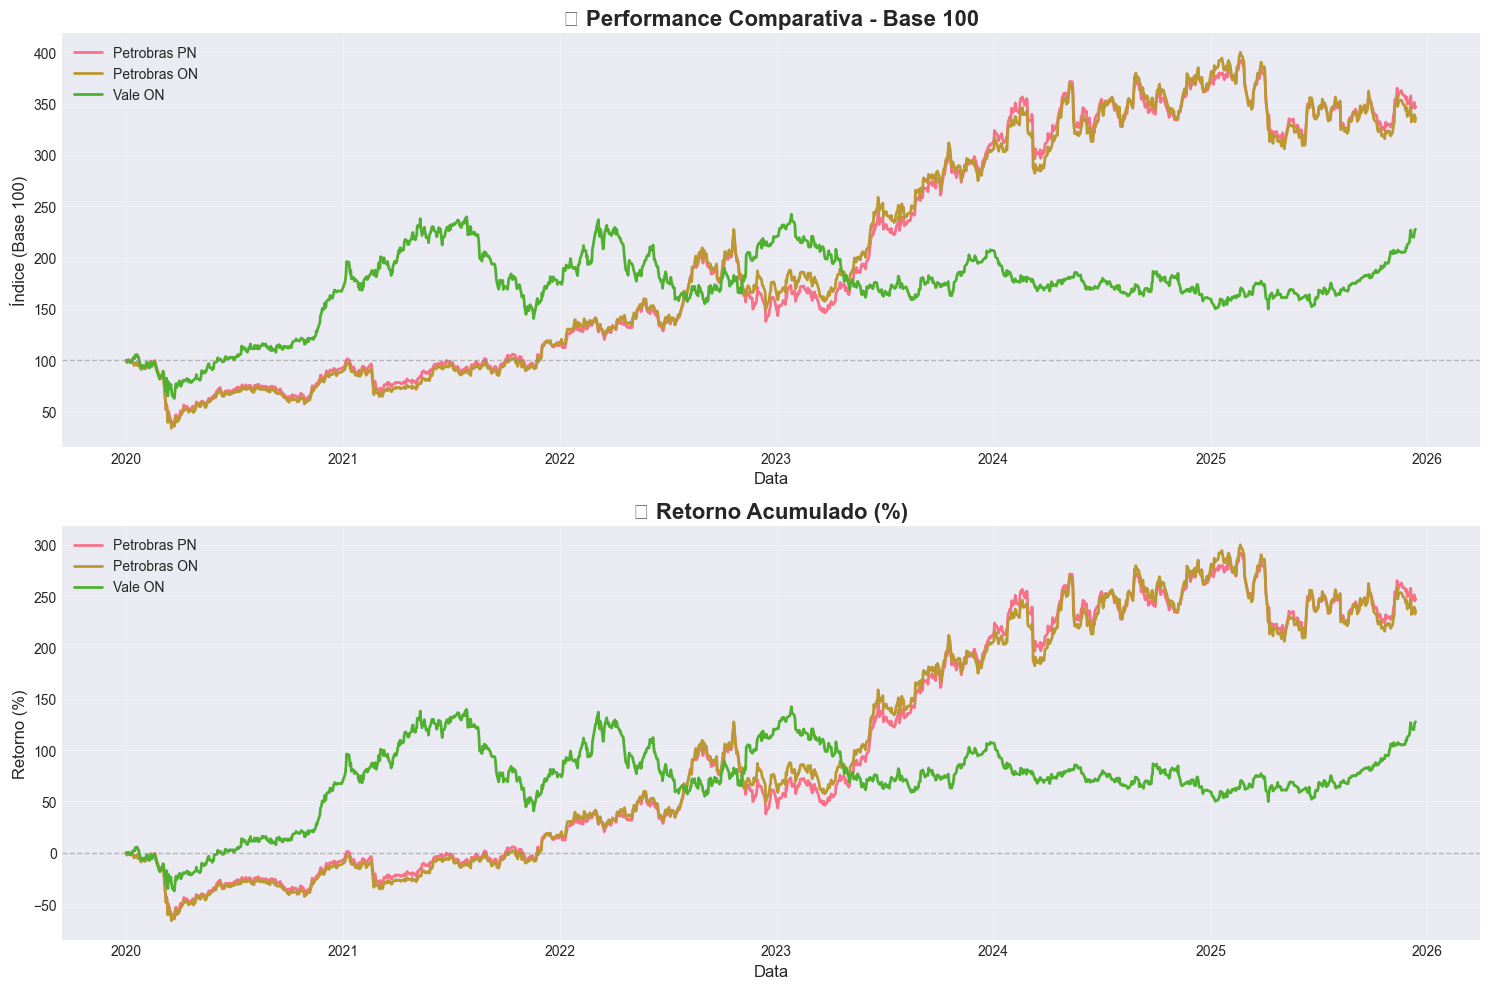


📊 ESTATÍSTICAS COMPARATIVAS

Petrobras PN (PETR4.SA):
   💰 Preço inicial: R$ 9.09
   💰 Preço final: R$ 31.59
   📈 Retorno total: +247.35%
   📊 Volatilidade anualizada: 41.85%

Petrobras ON (PETR3.SA):
   💰 Preço inicial: R$ 9.89
   💰 Preço final: R$ 33.28
   📈 Retorno total: +236.48%
   📊 Volatilidade anualizada: 43.61%

Vale ON (VALE3.SA):
   💰 Preço inicial: R$ 30.14
   💰 Preço final: R$ 68.61
   📈 Retorno total: +127.64%
   📊 Volatilidade anualizada: 35.52%

💡 Dica: Para o modelo LSTM, podemos treinar com um ticker
         e depois testar a generalização em outros tickers similares!


In [5]:
# Download de múltiplos tickers de uma vez
print("📊 Comparando múltiplas ações brasileiras do setor de energia/petróleo\n")

# Tickers para comparação
tickers_compare = ['PETR4.SA', 'PETR3.SA', 'VALE3.SA']
ticker_names = {
    'PETR4.SA': 'Petrobras PN',
    'PETR3.SA': 'Petrobras ON',
    'VALE3.SA': 'Vale ON'
}

# Download em lote
df_compare = yf.download(tickers_compare, start=START_DATE, end=END_DATE, progress=False)

# Plotar comparação de preços (normalizado)
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Normalizar preços (base 100 no início)
df_normalized = pd.DataFrame()
for ticker in tickers_compare:
    try:
        close_prices = df_compare['Close'][ticker]
        df_normalized[ticker] = (close_prices / close_prices.iloc[0]) * 100
    except:
        print(f"⚠️ Dados não disponíveis para {ticker}")

# Gráfico 1: Performance comparativa (normalizada)
for ticker in df_normalized.columns:
    axes[0].plot(df_normalized.index, df_normalized[ticker], 
                label=ticker_names.get(ticker, ticker), linewidth=2)

axes[0].set_title('📈 Performance Comparativa - Base 100', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Data', fontsize=12)
axes[0].set_ylabel('Índice (Base 100)', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
axes[0].axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Gráfico 2: Retornos acumulados
df_returns = pd.DataFrame()
for ticker in tickers_compare:
    try:
        close_prices = df_compare['Close'][ticker]
        df_returns[ticker] = ((close_prices / close_prices.iloc[0]) - 1) * 100
    except:
        pass

for ticker in df_returns.columns:
    axes[1].plot(df_returns.index, df_returns[ticker], 
                label=ticker_names.get(ticker, ticker), linewidth=2)

axes[1].set_title('📊 Retorno Acumulado (%)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Data', fontsize=12)
axes[1].set_ylabel('Retorno (%)', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)
axes[1].axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

# Estatísticas comparativas
print("\n📊 ESTATÍSTICAS COMPARATIVAS")
print("=" * 70)
for ticker in tickers_compare:
    try:
        close_prices = df_compare['Close'][ticker]
        total_return = ((close_prices.iloc[-1] / close_prices.iloc[0]) - 1) * 100
        volatility = close_prices.pct_change().std() * np.sqrt(252) * 100
        
        print(f"\n{ticker_names.get(ticker, ticker)} ({ticker}):")
        print(f"   💰 Preço inicial: R$ {close_prices.iloc[0]:.2f}")
        print(f"   💰 Preço final: R$ {close_prices.iloc[-1]:.2f}")
        print(f"   📈 Retorno total: {total_return:+.2f}%")
        print(f"   📊 Volatilidade anualizada: {volatility:.2f}%")
    except Exception as e:
        print(f"\n{ticker}: ⚠️ Dados não disponíveis")

print("\n💡 Dica: Para o modelo LSTM, podemos treinar com um ticker")
print("         e depois testar a generalização em outros tickers similares!")

### 🔍 Análise de Dados Financeiros Adicionais para o Projeto

**Objetivo do Projeto (Tech Challenge Fase 4):**
- Modelo LSTM para prever preço de fechamento de ações
- Deploy com API RESTful
- Métricas: MAE, RMSE, MAPE
- Focus: Previsão de séries temporais

Vamos explorar dados financeiros disponíveis e avaliar sua **relevância (0-10)** para nosso modelo:

In [6]:
# Exploração completa de dados financeiros disponíveis
ticker_obj = yf.Ticker(TICKER)

print("=" * 80)
print("📊 ANÁLISE DE DADOS FINANCEIROS DISPONÍVEIS - RATING DE RELEVÂNCIA")
print("=" * 80)

# Estrutura para armazenar avaliações
financial_data_evaluation = []

# 1. PREÇOS HISTÓRICOS (já estamos usando)
print("\n" + "="*80)
print("1️⃣ PREÇOS HISTÓRICOS (Close, Open, High, Low, Volume)")
print("="*80)
print("✅ Status: JÁ IMPLEMENTADO")
print("📊 Rating: 10/10")
print("💡 Justificativa:")
print("   • ESSENCIAL para LSTM de previsão de preços")
print("   • Dados diários completos e confiáveis")
print("   • Base do nosso modelo atual")
print("   • Volume pode indicar força de movimentos")
financial_data_evaluation.append({
    'categoria': 'Preços Históricos',
    'rating': 10,
    'status': 'Implementado',
    'uso': 'Feature principal do modelo'
})

# 2. DIVIDENDOS
print("\n" + "="*80)
print("2️⃣ DIVIDENDOS (ticker.dividends)")
print("="*80)
try:
    dividends = ticker_obj.dividends
    if len(dividends) > 0:
        print(f"✅ Dados disponíveis: {len(dividends)} pagamentos")
        print(f"   Último: R$ {dividends.iloc[-1]:.2f} em {dividends.index[-1].strftime('%Y-%m-%d')}")
    else:
        print("⚠️ Sem dividendos no período")
except:
    print("❌ Dados não disponíveis")

print("📊 Rating: 3/10")
print("💡 Justificativa:")
print("   • Eventos esporádicos (não diários)")
print("   • Impacto pontual no preço (ex-dividend date)")
print("   • Não crítico para modelo de curto prazo")
print("   • Poderia ser feature binária (teve dividendo: sim/não)")
financial_data_evaluation.append({
    'categoria': 'Dividendos',
    'rating': 3,
    'status': 'Não implementado',
    'uso': 'Feature auxiliar opcional'
})

# 3. SPLITS (DESDOBRAMENTOS)
print("\n" + "="*80)
print("3️⃣ SPLITS - Desdobramentos de Ações (ticker.splits)")
print("="*80)
try:
    splits = ticker_obj.splits
    if len(splits) > 0:
        print(f"✅ Dados disponíveis: {len(splits)} splits")
        for date, ratio in splits.items():
            print(f"   {date.strftime('%Y-%m-%d')}: {ratio}")
    else:
        print("✅ Sem splits no período (bom sinal)")
except:
    print("❌ Dados não disponíveis")

print("📊 Rating: 2/10")
print("💡 Justificativa:")
print("   • Eventos raríssimos")
print("   • yfinance já ajusta preços automaticamente")
print("   • Não adiciona valor ao modelo LSTM")
financial_data_evaluation.append({
    'categoria': 'Splits',
    'rating': 2,
    'status': 'Não necessário',
    'uso': 'Já tratado automaticamente'
})

# 4. DEMONSTRAÇÃO DE RESULTADOS (INCOME STATEMENT)
print("\n" + "="*80)
print("4️⃣ DEMONSTRAÇÃO DE RESULTADOS (ticker.income_stmt)")
print("="*80)
try:
    income = ticker_obj.income_stmt
    if income is not None and len(income.columns) > 0:
        print(f"✅ Dados disponíveis: {len(income.columns)} períodos")
        print(f"   Métricas: {len(income.index)} indicadores")
        print(f"\n   Principais linhas:")
        for idx in ['Total Revenue', 'Net Income', 'EBITDA'][:3]:
            if idx in income.index:
                print(f"   • {idx}")
    else:
        print("⚠️ Dados não disponíveis")
except:
    print("❌ Erro ao acessar dados")

print("📊 Rating: 4/10")
print("💡 Justificativa:")
print("   • Dados TRIMESTRAIS/ANUAIS (não diários)")
print("   • Impacto de longo prazo, não curto prazo")
print("   • Útil para análise fundamentalista, não para LSTM diário")
print("   • Poderia ser feature para previsão de longo prazo")
financial_data_evaluation.append({
    'categoria': 'Income Statement',
    'rating': 4,
    'status': 'Não prioritário',
    'uso': 'Análise fundamentalista'
})

# 5. BALANÇO PATRIMONIAL
print("\n" + "="*80)
print("5️⃣ BALANÇO PATRIMONIAL (ticker.balance_sheet)")
print("="*80)
try:
    balance = ticker_obj.balance_sheet
    if balance is not None and len(balance.columns) > 0:
        print(f"✅ Dados disponíveis: {len(balance.columns)} períodos")
        print(f"   Métricas: {len(balance.index)} indicadores")
    else:
        print("⚠️ Dados não disponíveis")
except:
    print("❌ Erro ao acessar dados")

print("📊 Rating: 3/10")
print("💡 Justificativa:")
print("   • Dados TRIMESTRAIS/ANUAIS")
print("   • Relevante para saúde financeira de longo prazo")
print("   • Não útil para previsão diária de preços")
financial_data_evaluation.append({
    'categoria': 'Balance Sheet',
    'rating': 3,
    'status': 'Não prioritário',
    'uso': 'Análise fundamentalista'
})

# 6. FLUXO DE CAIXA
print("\n" + "="*80)
print("6️⃣ FLUXO DE CAIXA (ticker.cash_flow)")
print("="*80)
try:
    cashflow = ticker_obj.cash_flow
    if cashflow is not None and len(cashflow.columns) > 0:
        print(f"✅ Dados disponíveis: {len(cashflow.columns)} períodos")
    else:
        print("⚠️ Dados não disponíveis")
except:
    print("❌ Erro ao acessar dados")

print("📊 Rating: 3/10")
print("💡 Justificativa:")
print("   • Dados TRIMESTRAIS/ANUAIS")
print("   • Importante para análise fundamentalista")
print("   • Não captura movimentos diários de preço")
financial_data_evaluation.append({
    'categoria': 'Cash Flow',
    'rating': 3,
    'status': 'Não prioritário',
    'uso': 'Análise fundamentalista'
})

# 7. INDICADORES TÉCNICOS (DERIVADOS)
print("\n" + "="*80)
print("7️⃣ INDICADORES TÉCNICOS (Calculados a partir de preços)")
print("="*80)
print("✅ Podem ser calculados: SMA, EMA, RSI, MACD, Bollinger Bands")
print("📊 Rating: 7/10")
print("💡 Justificativa:")
print("   • Capturam padrões técnicos conhecidos")
print("   • Médias móveis: tendências")
print("   • RSI: sobrecompra/sobrevenda")
print("   • MACD: momentum")
print("   • ÚTIL como features adicionais para LSTM")
print("   • Requer biblioteca adicional (ta-lib ou pandas-ta)")
financial_data_evaluation.append({
    'categoria': 'Indicadores Técnicos',
    'rating': 7,
    'status': 'Recomendado',
    'uso': 'Features adicionais para melhorar modelo'
})

# 8. NOTÍCIAS
print("\n" + "="*80)
print("8️⃣ NOTÍCIAS (ticker.news)")
print("="*80)
try:
    news = ticker_obj.news[:5]
    if news and len(news) > 0:
        print(f"✅ {len(news)} notícias recentes disponíveis")
        print(f"   Exemplo: {news[0].get('title', 'N/A')[:60]}...")
    else:
        print("⚠️ Notícias não disponíveis")
except:
    print("❌ Erro ao acessar notícias")

print("📊 Rating: 5/10")
print("💡 Justificativa:")
print("   • Impacto potencial no sentimento do mercado")
print("   • Requer NLP para análise de sentimento")
print("   • Complexidade adicional (fora do escopo básico)")
print("   • Interessante para projeto avançado")
financial_data_evaluation.append({
    'categoria': 'Notícias',
    'rating': 5,
    'status': 'Projeto futuro',
    'uso': 'Análise de sentimento (NLP)'
})

# 9. RECOMENDAÇÕES DE ANALISTAS
print("\n" + "="*80)
print("9️⃣ RECOMENDAÇÕES DE ANALISTAS (ticker.recommendations)")
print("="*80)
try:
    recs = ticker_obj.recommendations
    if recs is not None and len(recs) > 0:
        print(f"✅ {len(recs)} recomendações disponíveis")
        print(f"   Última: {recs.index[-1].strftime('%Y-%m-%d')}")
    else:
        print("⚠️ Recomendações não disponíveis")
except:
    print("❌ Erro ao acessar recomendações")

print("📊 Rating: 4/10")
print("💡 Justificativa:")
print("   • Dados esporádicos")
print("   • Impacto limitado em movimentos diários")
print("   • Melhor para análise de longo prazo")
financial_data_evaluation.append({
    'categoria': 'Recomendações',
    'rating': 4,
    'status': 'Não prioritário',
    'uso': 'Análise complementar'
})

# 10. EARNINGS (LUCROS)
print("\n" + "="*80)
print("🔟 EARNINGS - Resultados Trimestrais (ticker.earnings)")
print("="*80)
try:
    earnings = ticker_obj.earnings
    if earnings is not None and len(earnings) > 0:
        print(f"✅ {len(earnings)} períodos disponíveis")
        print(f"   Último: {earnings.index[-1]}")
    else:
        print("⚠️ Dados não disponíveis")
except:
    print("❌ Erro ao acessar earnings")

print("📊 Rating: 6/10")
print("💡 Justificativa:")
print("   • Eventos trimestrais importantes")
print("   • Forte impacto no dia do anúncio")
print("   • Poderia ser feature: 'dias até próximo earnings'")
print("   • Útil para capturar volatilidade pré-earnings")
financial_data_evaluation.append({
    'categoria': 'Earnings',
    'rating': 6,
    'status': 'Potencial feature',
    'uso': 'Contagem de dias até earnings'
})

# RESUMO FINAL
print("\n" + "="*80)
print("📊 RESUMO - RANKING DE RELEVÂNCIA PARA LSTM DE PREVISÃO")
print("="*80)

# Ordenar por rating
df_eval = pd.DataFrame(financial_data_evaluation)
df_eval_sorted = df_eval.sort_values('rating', ascending=False)

for idx, row in df_eval_sorted.iterrows():
    stars = '⭐' * row['rating']
    print(f"\n{stars} ({row['rating']}/10) - {row['categoria']}")
    print(f"   Status: {row['status']}")
    print(f"   Uso: {row['uso']}")

print("\n" + "="*80)
print("🎯 RECOMENDAÇÕES PARA O PROJETO")
print("="*80)
print("\n✅ IMPLEMENTAR AGORA (Rating 7-10):")
print("   1. Preços Históricos (Close, Open, High, Low, Volume) - JÁ FEITO")
print("   2. Indicadores Técnicos (SMA, EMA, RSI, MACD)")
print("      → Adicionar como features extras ao LSTM")

print("\n🔄 CONSIDERAR PARA VERSÃO 2.0 (Rating 5-6):")
print("   3. Earnings (dias até próximo resultado)")
print("   4. Notícias + Análise de Sentimento (NLP)")

print("\n❌ NÃO PRIORITÁRIO PARA LSTM DIÁRIO (Rating 2-4):")
print("   5. Demonstrações Financeiras (Income, Balance, Cash Flow)")
print("   6. Dividendos e Splits")
print("   7. Recomendações de Analistas")
print("   → Melhor para análise fundamentalista de longo prazo")

print("\n💡 PRÓXIMO PASSO SUGERIDO:")
print("   Implementar indicadores técnicos (SMA, EMA, RSI) como features")
print("   adicionais ao modelo LSTM para melhorar performance!")

📊 ANÁLISE DE DADOS FINANCEIROS DISPONÍVEIS - RATING DE RELEVÂNCIA

1️⃣ PREÇOS HISTÓRICOS (Close, Open, High, Low, Volume)
✅ Status: JÁ IMPLEMENTADO
📊 Rating: 10/10
💡 Justificativa:
   • ESSENCIAL para LSTM de previsão de preços
   • Dados diários completos e confiáveis
   • Base do nosso modelo atual
   • Volume pode indicar força de movimentos

2️⃣ DIVIDENDOS (ticker.dividends)
✅ Dados disponíveis: 58 pagamentos
   Último: R$ 0.67 em 2025-08-22
📊 Rating: 3/10
💡 Justificativa:
   • Eventos esporádicos (não diários)
   • Impacto pontual no preço (ex-dividend date)
   • Não crítico para modelo de curto prazo
   • Poderia ser feature binária (teve dividendo: sim/não)

3️⃣ SPLITS - Desdobramentos de Ações (ticker.splits)
✅ Dados disponíveis: 2 splits
   2005-09-01: 4.0
   2008-04-28: 2.0
📊 Rating: 2/10
💡 Justificativa:
   • Eventos raríssimos
   • yfinance já ajusta preços automaticamente
   • Não adiciona valor ao modelo LSTM

4️⃣ DEMONSTRAÇÃO DE RESULTADOS (ticker.income_stmt)
✅ Dados di

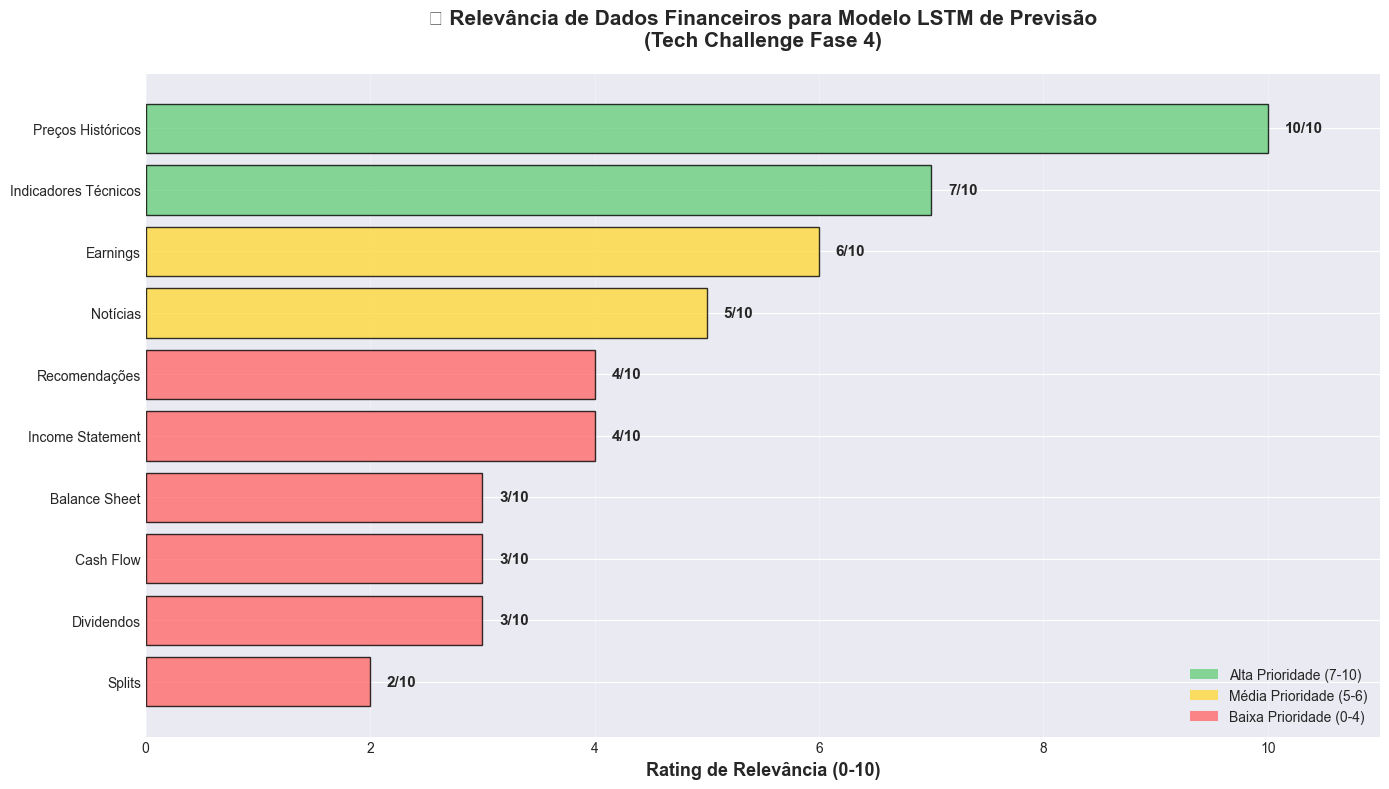


📋 TABELA RESUMO - DADOS FINANCEIROS

Categoria                      Rating     Status               Prioridade
--------------------------------------------------------------------------------
Preços Históricos              10         Implementado         🟢 Alta
Indicadores Técnicos           7          Recomendado          🟢 Alta
Earnings                       6          Potencial feature    🟡 Média
Notícias                       5          Projeto futuro       🟡 Média
Income Statement               4          Não prioritário      🔴 Baixa
Recomendações                  4          Não prioritário      🔴 Baixa
Cash Flow                      3          Não prioritário      🔴 Baixa
Dividendos                     3          Não implementado     🔴 Baixa
Balance Sheet                  3          Não prioritário      🔴 Baixa
Splits                         2          Não necessário       🔴 Baixa

✅ CONCLUSÃO: Focar em Preços Históricos + Indicadores Técnicos!


In [7]:
# Visualização gráfica do ranking
import matplotlib.pyplot as plt

# Criar DataFrame para visualização
df_viz = pd.DataFrame(financial_data_evaluation)
df_viz_sorted = df_viz.sort_values('rating', ascending=True)

# Gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#FF6B6B' if r < 5 else '#FFD93D' if r < 7 else '#6BCF7F' 
          for r in df_viz_sorted['rating']]

bars = ax.barh(df_viz_sorted['categoria'], df_viz_sorted['rating'], color=colors, alpha=0.8, edgecolor='black')

# Adicionar valores nas barras
for i, (bar, rating) in enumerate(zip(bars, df_viz_sorted['rating'])):
    ax.text(rating + 0.15, bar.get_y() + bar.get_height()/2, 
            f'{rating}/10', 
            va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Rating de Relevância (0-10)', fontsize=13, fontweight='bold')
ax.set_title('📊 Relevância de Dados Financeiros para Modelo LSTM de Previsão\n(Tech Challenge Fase 4)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(0, 11)
ax.grid(axis='x', alpha=0.3)

# Legenda de cores
from matplotlib.patches import Rectangle
legend_elements = [
    Rectangle((0,0),1,1, facecolor='#6BCF7F', alpha=0.8, label='Alta Prioridade (7-10)'),
    Rectangle((0,0),1,1, facecolor='#FFD93D', alpha=0.8, label='Média Prioridade (5-6)'),
    Rectangle((0,0),1,1, facecolor='#FF6B6B', alpha=0.8, label='Baixa Prioridade (0-4)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

# Tabela formatada
print("\n" + "="*80)
print("📋 TABELA RESUMO - DADOS FINANCEIROS")
print("="*80)
print(f"\n{'Categoria':<30} {'Rating':<10} {'Status':<20} {'Prioridade'}")
print("-" * 80)

for _, row in df_viz_sorted.sort_values('rating', ascending=False).iterrows():
    priority = '🔴 Baixa' if row['rating'] < 5 else '🟡 Média' if row['rating'] < 7 else '🟢 Alta'
    print(f"{row['categoria']:<30} {row['rating']:<10} {row['status']:<20} {priority}")

print("\n" + "="*80)
print("✅ CONCLUSÃO: Focar em Preços Históricos + Indicadores Técnicos!")
print("="*80)

## 📈 3. Engenharia de Features - Indicadores Técnicos

Vamos adicionar indicadores técnicos aos nossos dados para enriquecer o poder preditivo do modelo:

**Indicadores Selecionados:**
1. **SMA (Simple Moving Average)** - Médias móveis de 20, 50 e 200 dias
2. **EMA (Exponential Moving Average)** - Médias exponenciais de 12 e 26 dias
3. **RSI (Relative Strength Index)** - Índice de força relativa (14 dias)
4. **MACD (Moving Average Convergence Divergence)** - MACD, Signal e Histograma
5. **Bollinger Bands** - Bandas superior, média e inferior

In [12]:
# Calcular Indicadores Técnicos usando pandas-ta
import pandas_ta as ta

print("📊 Adicionando Indicadores Técnicos ao DataFrame...")
print(f"Shape antes: {df.shape}")

# 1. SMA - Simple Moving Averages (20, 50, 200 dias)
df['SMA_20'] = ta.sma(df['Close'], length=20)
df['SMA_50'] = ta.sma(df['Close'], length=50)
df['SMA_200'] = ta.sma(df['Close'], length=200)
print("✅ SMAs calculadas (20, 50, 200)")

# 2. EMA - Exponential Moving Averages (12, 26 dias)
df['EMA_12'] = ta.ema(df['Close'], length=12)
df['EMA_26'] = ta.ema(df['Close'], length=26)
print("✅ EMAs calculadas (12, 26)")

# 3. RSI - Relative Strength Index (14 dias)
df['RSI_14'] = ta.rsi(df['Close'], length=14)
print("✅ RSI calculado (14)")

# 4. MACD - Moving Average Convergence Divergence
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
# Renomear colunas MACD
if 'MACD_12_26_9' in df.columns:
    df.rename(columns={
        'MACD_12_26_9': 'MACD',
        'MACDs_12_26_9': 'MACD_signal',
        'MACDh_12_26_9': 'MACD_hist'
    }, inplace=True)
    print("✅ MACD calculado (12, 26, 9)")

# 5. Bollinger Bands (20 dias, 2 desvios padrão)
df.ta.bbands(close='Close', length=20, std=2, append=True)
# Renomear colunas Bollinger Bands
if 'BBL_20_2.0' in df.columns:
    df.rename(columns={
        'BBL_20_2.0': 'BB_lower',
        'BBM_20_2.0': 'BB_middle',
        'BBU_20_2.0': 'BB_upper'
    }, inplace=True)
    print("✅ Bollinger Bands calculadas (20, 2σ)")

# 6. Volatilidade - ATR (Average True Range)
df['ATR_14'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)
print("✅ ATR calculado (14)")

print(f"\nShape depois: {df.shape}")
print(f"Total de features: {df.shape[1]}")

# Mostrar colunas disponíveis
print(f"\n📊 Colunas do DataFrame:")
print(list(df.columns))

# Visualizar últimas linhas com os novos indicadores
print("\n📋 Últimas 5 linhas com indicadores:")
df.tail()

📊 Adicionando Indicadores Técnicos ao DataFrame...
Shape antes: (1484, 12)
✅ SMAs calculadas (20, 50, 200)
✅ EMAs calculadas (12, 26)
✅ RSI calculado (14)
✅ MACD calculado (12, 26, 9)
✅ ATR calculado (14)

Shape depois: (1484, 20)
Total de features: 20

📊 Colunas do DataFrame:
['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'RSI_14', 'ATR_14', 'MACD', 'MACD_hist', 'MACD_signal', 'BBL_20_2.0_2.0', 'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0']

📋 Últimas 5 linhas com indicadores:


Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,SMA_200,EMA_12,EMA_26,RSI_14,ATR_14,MACD,MACD_hist,MACD_signal,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0
Date,,,,,,,,,,,,,,,,,,,,
2025-12-08,31.660000,31.990000,31.490000,31.570000,30271600,32.369,31.1764,31.107101,32.028634,31.851041,47.913451,0.631355,0.177594,-0.152028,0.329622,31.453154,32.369,33.284847,5.658790,0.112926
2025-12-09,31.860001,31.900000,31.330000,31.610001,23863000,32.344,31.1774,31.088596,32.002691,31.851705,50.299868,0.626972,0.150986,-0.142909,0.293895,31.400247,32.344,33.287754,5.835723,0.243577
2025-12-10,31.940001,31.990000,31.540001,31.879999,22123700,32.281,31.1870,31.071742,31.993046,31.858245,51.261775,0.614331,0.134801,-0.127275,0.262076,31.412634,32.281,33.149366,5.380044,0.303654
2025-12-11,31.410000,31.900000,31.250000,31.879999,64927900,32.234,31.1876,31.053026,31.903347,31.825042,45.042125,0.619736,0.078305,-0.147017,0.225322,31.283490,32.234,33.184511,5.897565,0.066548
2025-12-12,31.590000,31.719999,31.340000,31.410000,39659900,32.189,31.1978,31.035209,31.855140,31.807631,47.377338,0.602612,0.047508,-0.142251,0.189759,31.204897,32.189,33.173104,6.114533,0.195662


In [13]:
# Lidar com valores NaN (gerados pelos indicadores técnicos)
print("🔍 Verificando valores NaN:")
print(df.isnull().sum())

# Preencher NaN com método forward-fill (usar último valor válido)
df_filled = df.fillna(method='ffill')
print(f"\n✅ NaN preenchidos com forward-fill")
print(f"NaN restantes: {df_filled.isnull().sum().sum()}")

# Se ainda houver NaN no início (período de warm-up), preencher com backfill
df_filled = df_filled.fillna(method='bfill')
print(f"NaN após backfill: {df_filled.isnull().sum().sum()}")

df = df_filled
print(f"\n✅ DataFrame limpo: {df.shape}")

🔍 Verificando valores NaN:
Price
Close               0
High                0
Low                 0
Open                0
Volume              0
SMA_20             19
SMA_50             49
SMA_200           199
EMA_12             11
EMA_26             25
RSI_14              1
ATR_14             13
MACD               25
MACD_hist          33
MACD_signal        33
BBL_20_2.0_2.0     19
BBM_20_2.0_2.0     19
BBU_20_2.0_2.0     19
BBB_20_2.0_2.0     19
BBP_20_2.0_2.0     19
dtype: int64

✅ NaN preenchidos com forward-fill
NaN restantes: 503
NaN após backfill: 0

✅ DataFrame limpo: (1484, 20)


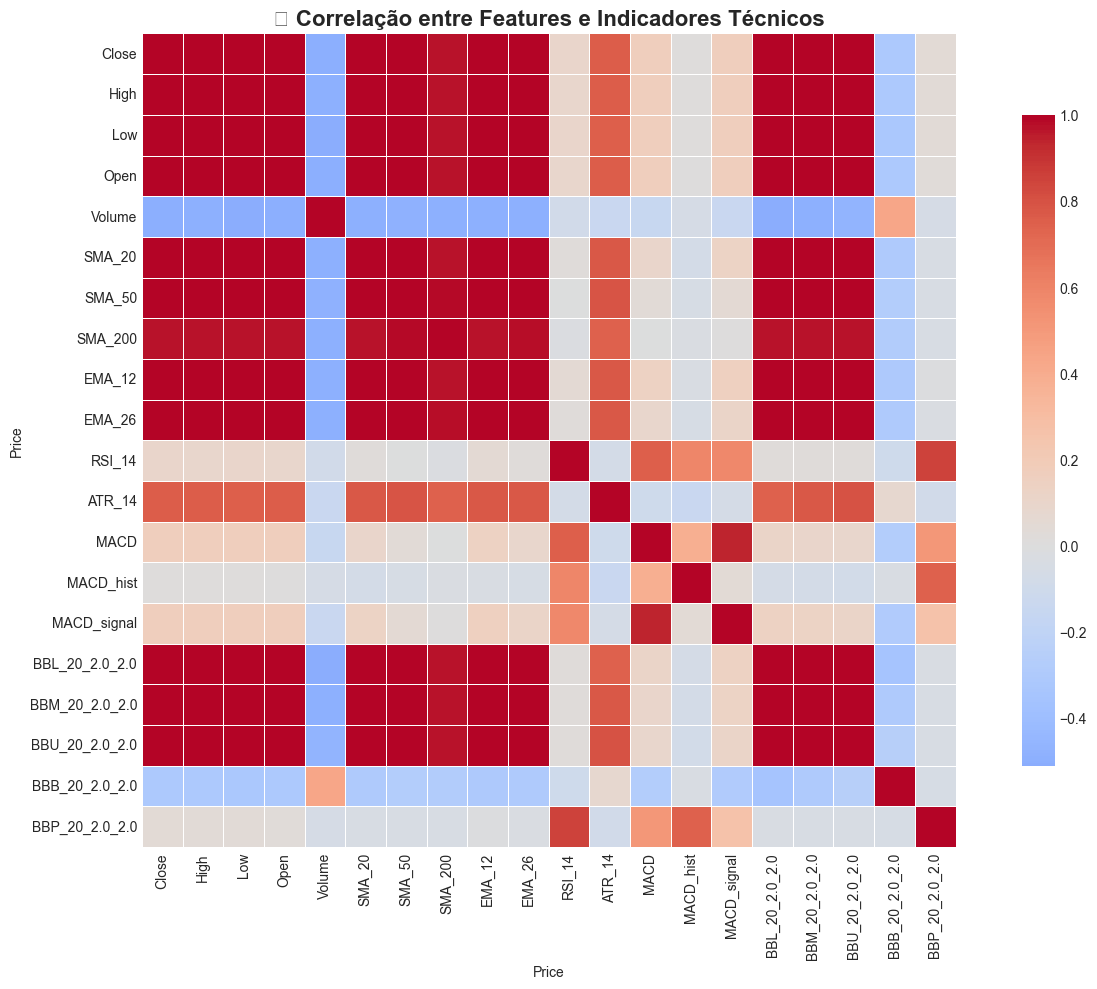


📈 Correlação dos Indicadores com Preço de Fechamento (Close):
Low                 :  0.9998
High                :  0.9998
Open                :  0.9995
EMA_12              :  0.9981
EMA_26              :  0.9959
SMA_20              :  0.9952
BBM_20_2.0_2.0      :  0.9952
BBL_20_2.0_2.0      :  0.9935
BBU_20_2.0_2.0      :  0.9920
SMA_50              :  0.9903
SMA_200             :  0.9701
ATR_14              :  0.7595
MACD_signal         :  0.1702
MACD                :  0.1677
RSI_14              :  0.1015
BBP_20_2.0_2.0      :  0.0412
MACD_hist           :  0.0138
BBB_20_2.0_2.0      : -0.3147
Volume              : -0.5041


In [14]:
# Visualizar correlação dos indicadores técnicos com o preço de fechamento
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(14, 10))
correlation_matrix = df[numeric_cols].corr()

# Heatmap de correlação
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('📊 Correlação entre Features e Indicadores Técnicos', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlação específica com o preço de fechamento (Close)
print("\n📈 Correlação dos Indicadores com Preço de Fechamento (Close):")
close_corr = correlation_matrix['Close'].sort_values(ascending=False)
for col, val in close_corr.items():
    if col != 'Close':
        print(f"{col:20s}: {val:7.4f}")

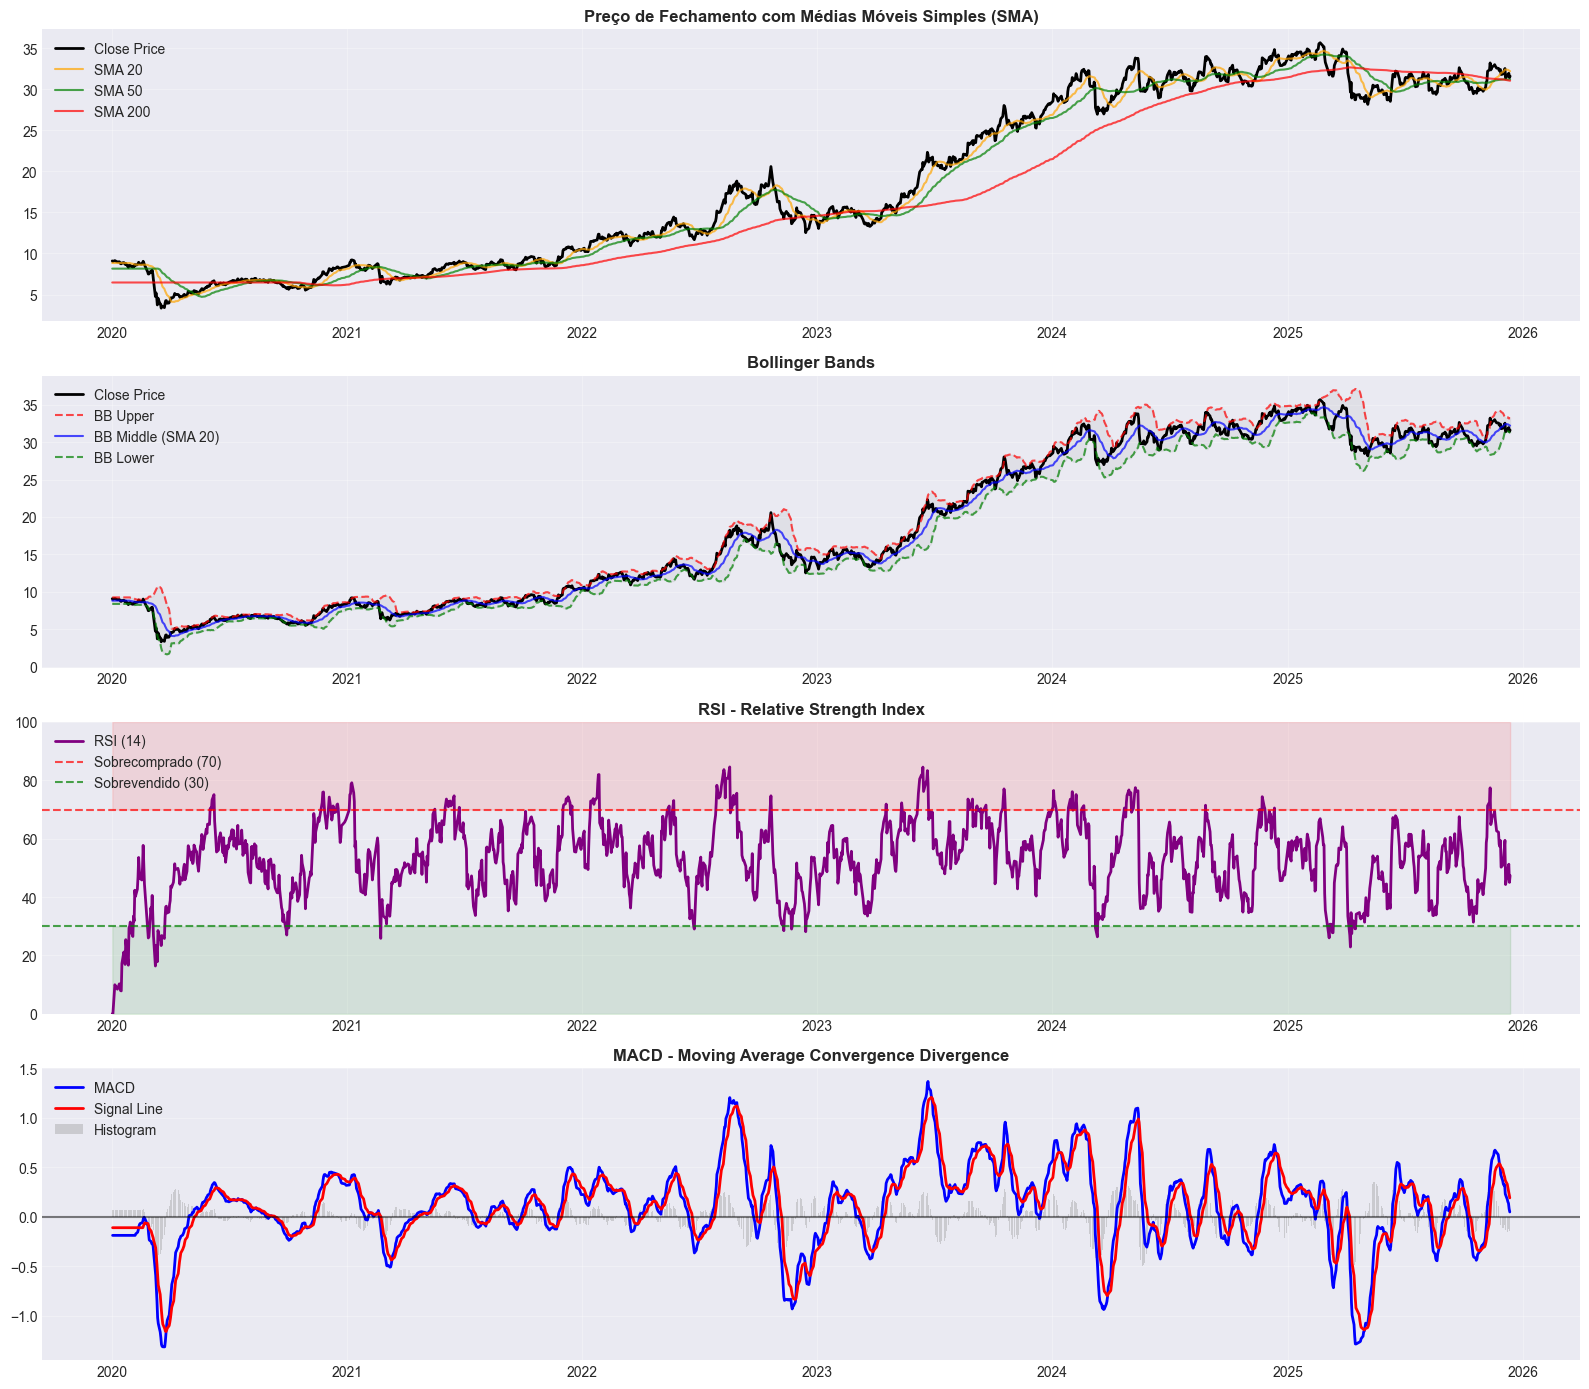

✅ Indicadores técnicos visualizados com sucesso!


In [16]:
# Visualização gráfica dos principais indicadores técnicos
fig, axes = plt.subplots(4, 1, figsize=(16, 14))

# 1. Preço com SMAs
axes[0].plot(df.index, df['Close'], label='Close Price', color='black', linewidth=2)
axes[0].plot(df.index, df['SMA_20'], label='SMA 20', color='orange', alpha=0.7)
axes[0].plot(df.index, df['SMA_50'], label='SMA 50', color='green', alpha=0.7)
axes[0].plot(df.index, df['SMA_200'], label='SMA 200', color='red', alpha=0.7)
axes[0].set_title('Preço de Fechamento com Médias Móveis Simples (SMA)', fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# 2. Bollinger Bands (usar nomes corretos das colunas)
axes[1].plot(df.index, df['Close'], label='Close Price', color='black', linewidth=2)
# Verificar nomes das colunas BB
bb_cols = [col for col in df.columns if 'BB' in col]
if 'BBU_20_2.0_2.0' in df.columns:
    axes[1].plot(df.index, df['BBU_20_2.0_2.0'], label='BB Upper', color='red', linestyle='--', alpha=0.7)
    axes[1].plot(df.index, df['BBM_20_2.0_2.0'], label='BB Middle (SMA 20)', color='blue', alpha=0.7)
    axes[1].plot(df.index, df['BBL_20_2.0_2.0'], label='BB Lower', color='green', linestyle='--', alpha=0.7)
    axes[1].fill_between(df.index, df['BBU_20_2.0_2.0'], df['BBL_20_2.0_2.0'], alpha=0.1, color='gray')
axes[1].set_title('Bollinger Bands', fontweight='bold')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# 3. RSI
axes[2].plot(df.index, df['RSI_14'], label='RSI (14)', color='purple', linewidth=2)
axes[2].axhline(y=70, color='red', linestyle='--', label='Sobrecomprado (70)', alpha=0.7)
axes[2].axhline(y=30, color='green', linestyle='--', label='Sobrevendido (30)', alpha=0.7)
axes[2].fill_between(df.index, 70, 100, alpha=0.1, color='red')
axes[2].fill_between(df.index, 0, 30, alpha=0.1, color='green')
axes[2].set_title('RSI - Relative Strength Index', fontweight='bold')
axes[2].set_ylim(0, 100)
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.3)

# 4. MACD
axes[3].plot(df.index, df['MACD'], label='MACD', color='blue', linewidth=2)
axes[3].plot(df.index, df['MACD_signal'], label='Signal Line', color='red', linewidth=2)
axes[3].bar(df.index, df['MACD_hist'], label='Histogram', color='gray', alpha=0.3, width=1)
axes[3].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[3].set_title('MACD - Moving Average Convergence Divergence', fontweight='bold')
axes[3].legend(loc='upper left')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Indicadores técnicos visualizados com sucesso!")

### 📊 Análise dos Indicadores Técnicos

**Interpretação:**

1. **SMAs (20, 50, 200):** Identificam tendências de curto, médio e longo prazo. Cruzamentos entre SMAs são sinais importantes.

2. **Bollinger Bands:** Medem volatilidade. Preço próximo à banda superior indica possível sobrecompra; próximo à inferior, sobrevenda.

3. **RSI (14):** Valores > 70 indicam sobrecompra, < 30 indicam sobrevenda. Ajuda identificar reversões.

4. **MACD:** Cruzamento MACD/Signal indica mudança de tendência. Histograma mostra força da tendência.

5. **ATR (14):** Mede volatilidade absoluta. Valores altos = alta volatilidade.

**Decisão para o Modelo:**
- ✅ Usar todos os indicadores como features adicionais
- ✅ Total de features: 6 (básicas) + 14 (indicadores) = **20 features**

In [17]:
# Verificar valores nulos
print("🔍 Análise de valores nulos:")
print(df.isnull().sum())

# Estatísticas descritivas
print("\n📊 Estatísticas descritivas:")
df.describe()

🔍 Análise de valores nulos:
Price
Close             0
High              0
Low               0
Open              0
Volume            0
SMA_20            0
SMA_50            0
SMA_200           0
EMA_12            0
EMA_26            0
RSI_14            0
ATR_14            0
MACD              0
MACD_hist         0
MACD_signal       0
BBL_20_2.0_2.0    0
BBM_20_2.0_2.0    0
BBU_20_2.0_2.0    0
BBB_20_2.0_2.0    0
BBP_20_2.0_2.0    0
dtype: int64

📊 Estatísticas descritivas:


Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,SMA_200,EMA_12,EMA_26,RSI_14,ATR_14,MACD,MACD_hist,MACD_signal,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0
count,1484.000000,1484.000000,1484.000000,1484.000000,1.484000e+03,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,18.612991,18.843171,18.384900,18.615330,6.114272e+07,18.464335,18.215636,16.948423,18.528148,18.418812,53.236762,0.494353,0.104547,0.002296,0.105040,17.183210,18.464335,19.745460,16.167106,0.570575
std,10.268550,10.342424,10.200452,10.271966,3.729101e+07,10.215208,10.159412,9.913898,10.229653,10.187205,12.870918,0.195552,0.413694,0.145035,0.379983,9.823549,10.215208,10.659108,13.770728,0.325877
min,3.344522,3.608174,3.214178,3.279350,9.356900e+06,4.101262,4.713437,6.117919,4.213487,4.912178,0.000000,0.140290,-1.317184,-0.541240,-1.162107,1.666618,4.101262,5.005281,2.796610,-0.425789
25%,8.679022,8.815233,8.548725,8.664293,3.548600e+07,8.627920,8.319596,7.431905,8.666040,8.606019,45.249368,0.303613,-0.118560,-0.073692,-0.103017,7.964541,8.627920,9.271056,9.141090,0.290555
50%,15.228485,15.574319,15.029992,15.213890,5.343480e+07,15.126027,14.797697,14.535336,15.175731,15.071848,53.931428,0.527284,0.123438,0.013214,0.120593,13.618701,15.126027,16.204113,13.176802,0.620226
75%,30.104191,30.469999,29.810353,30.146370,7.631690e+07,30.336953,30.143505,28.435841,30.257801,30.443739,62.022686,0.629032,0.324329,0.080513,0.299933,28.296830,30.336953,31.961442,18.496346,0.833001
max,35.662773,35.810985,35.486776,35.690565,4.902304e+08,34.691080,34.237860,32.656362,35.025794,34.691291,84.585647,1.126007,1.367637,0.384323,1.206783,33.891801,34.691080,37.087039,136.238187,1.334973


## 📊 Fase 1.3: Análise Exploratória de Dados (EDA)

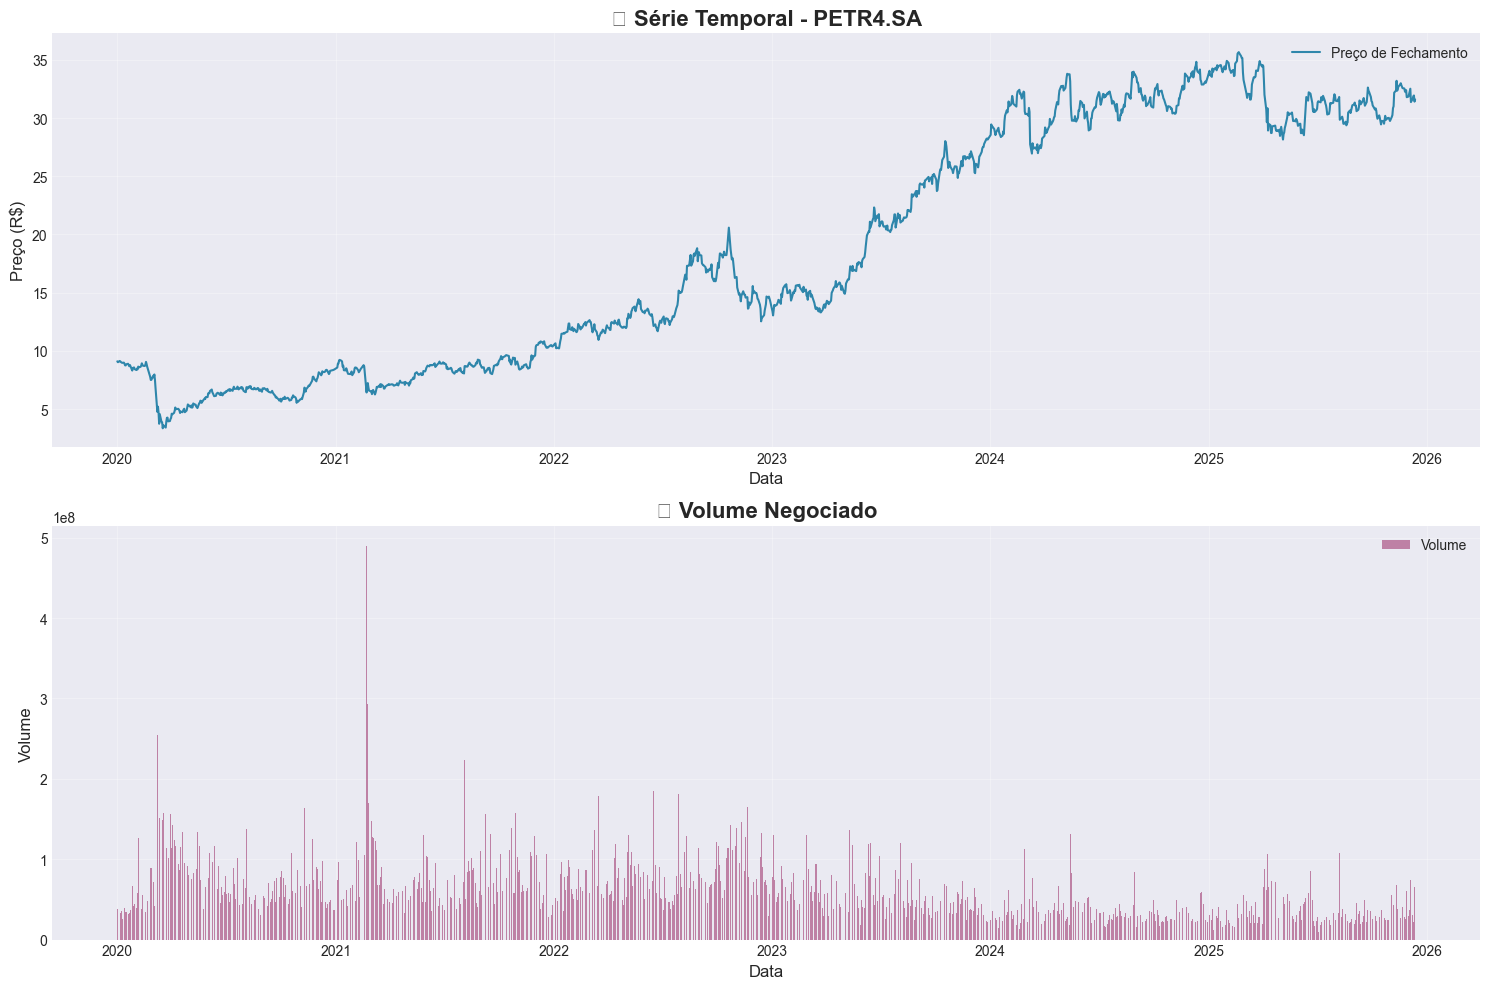

💰 Preço médio: R$ 18.61
📊 Volatilidade (desvio padrão): R$ 10.27
📈 Preço máximo: R$ 35.66
📉 Preço mínimo: R$ 3.34


In [18]:
# Gráfico 1: Série Temporal do Preço de Fechamento
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Preço de fechamento
axes[0].plot(df.index, df['Close'], linewidth=1.5, color='#2E86AB', label='Preço de Fechamento')
axes[0].set_title(f'📈 Série Temporal - {TICKER}', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Data', fontsize=12)
axes[0].set_ylabel('Preço (R$)', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Volume negociado
axes[1].bar(df.index, df['Volume'], color='#A23B72', alpha=0.6, label='Volume')
axes[1].set_title('📊 Volume Negociado', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Data', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"💰 Preço médio: R$ {df['Close'].mean():.2f}")
print(f"📊 Volatilidade (desvio padrão): R$ {df['Close'].std():.2f}")
print(f"📈 Preço máximo: R$ {df['Close'].max():.2f}")
print(f"📉 Preço mínimo: R$ {df['Close'].min():.2f}")

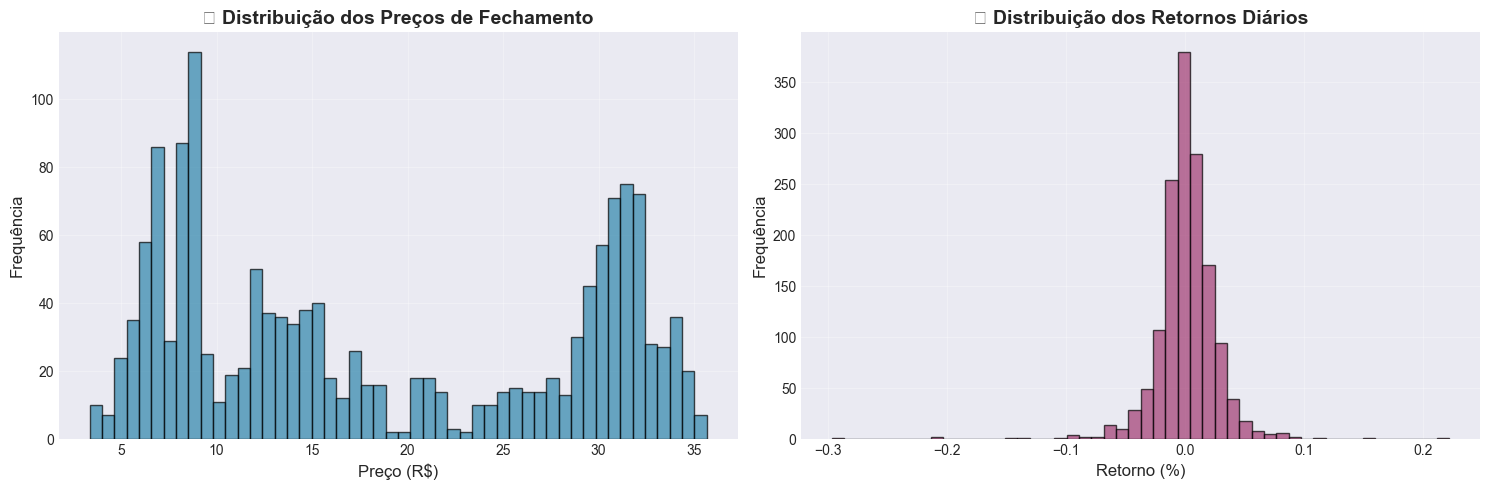

📊 Retorno médio diário: 0.1198%
📊 Volatilidade dos retornos: 2.6364%


In [19]:
# Gráfico 2: Distribuição dos Preços e Retornos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribuição dos preços
axes[0].hist(df['Close'], bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0].set_title('📊 Distribuição dos Preços de Fechamento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Preço (R$)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].grid(alpha=0.3)

# Retornos diários
df['Returns'] = df['Close'].pct_change()
axes[1].hist(df['Returns'].dropna(), bins=50, color='#A23B72', alpha=0.7, edgecolor='black')
axes[1].set_title('📊 Distribuição dos Retornos Diários', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Retorno (%)', fontsize=12)
axes[1].set_ylabel('Frequência', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Retorno médio diário: {df['Returns'].mean()*100:.4f}%")
print(f"📊 Volatilidade dos retornos: {df['Returns'].std()*100:.4f}%")

## 🔧 Fase 1.4: Pré-processamento para LSTM

In [20]:
# Selecionar apenas preço de fechamento
data = df[['Close']].values
print(f"📊 Shape dos dados: {data.shape}")

# Normalização usando MinMaxScaler (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

print(f"✅ Dados normalizados!")
print(f"📊 Valor mínimo normalizado: {data_normalized.min():.4f}")
print(f"📊 Valor máximo normalizado: {data_normalized.max():.4f}")
print(f"\n⚠️ CRÍTICO: Scaler salvo para uso posterior na API!")

📊 Shape dos dados: (1484, 1)
✅ Dados normalizados!
📊 Valor mínimo normalizado: 0.0000
📊 Valor máximo normalizado: 1.0000

⚠️ CRÍTICO: Scaler salvo para uso posterior na API!


In [21]:
# Criar sequências temporais (sliding window)
LOOKBACK = 60  # Usar 60 dias para prever o próximo dia

def create_sequences(data, lookback):
    """
    Cria sequências temporais para LSTM.
    
    Args:
        data: Array normalizado de preços
        lookback: Número de dias passados para usar como entrada
    
    Returns:
        X: Features (sequências de entrada)
        y: Target (próximo valor)
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    
    X = np.array(X)
    y = np.array(y)
    
    # Reshape para LSTM: (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    return X, y

X, y = create_sequences(data_normalized, LOOKBACK)

print(f"✅ Sequências criadas!")
print(f"📊 Shape de X (features): {X.shape}")
print(f"📊 Shape de y (targets): {y.shape}")
print(f"\n📝 Interpretação:")
print(f"   - {X.shape[0]} amostras")
print(f"   - {X.shape[1]} timesteps (dias passados)")
print(f"   - {X.shape[2]} feature(s) por timestep")

✅ Sequências criadas!
📊 Shape de X (features): (1424, 60, 1)
📊 Shape de y (targets): (1424,)

📝 Interpretação:
   - 1424 amostras
   - 60 timesteps (dias passados)
   - 1 feature(s) por timestep


In [22]:
# Dividir dados: 70% treino, 15% validação, 15% teste
train_size = int(len(X) * 0.70)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"📊 Divisão dos dados:")
print(f"   🔵 Treino:     {len(X_train):4d} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   🟢 Validação:  {len(X_val):4d} amostras ({len(X_val)/len(X)*100:.1f}%)")
print(f"   🟡 Teste:      {len(X_test):4d} amostras ({len(X_test)/len(X)*100:.1f}%)")
print(f"   ⚪ Total:      {len(X):4d} amostras")

# Converter para tensores PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

print(f"\n✅ Dados prontos para treinamento!")

📊 Divisão dos dados:
   🔵 Treino:      996 amostras (69.9%)
   🟢 Validação:   213 amostras (15.0%)
   🟡 Teste:       215 amostras (15.1%)
   ⚪ Total:      1424 amostras

✅ Dados prontos para treinamento!


## 🧠 Fase 2: Construção do Modelo LSTM

In [23]:
# Definir arquitetura do modelo LSTM
class StockLSTM(nn.Module):
    """
    Modelo LSTM para previsão de preços de ações.
    
    Arquitetura:
    - LSTM Layer: Captura padrões temporais
    - Dropout: Previne overfitting
    - Dense Layer: Saída com previsão
    """
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, dropout=0.2):
        super(StockLSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Camada LSTM
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        
        # Dropout adicional
        self.dropout = nn.Dropout(dropout)
        
        # Camada Dense (saída)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)
        
        # Pegar última saída temporal
        lstm_out = lstm_out[:, -1, :]
        
        # Dropout
        out = self.dropout(lstm_out)
        
        # Camada de saída
        out = self.fc(out)
        
        return out

# Instanciar modelo
model = StockLSTM(
    input_size=1,
    hidden_size=50,
    num_layers=2,
    dropout=0.2
)

# Device (CPU ou GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print("✅ Modelo LSTM criado!")
print(f"🖥️  Device: {device}")
print(f"\n📊 Arquitetura do modelo:")
print(model)
print(f"\n📈 Total de parâmetros: {sum(p.numel() for p in model.parameters()):,}")

✅ Modelo LSTM criado!
🖥️  Device: cpu

📊 Arquitetura do modelo:
StockLSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

📈 Total de parâmetros: 31,051


In [24]:
# Configuração do treinamento
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hiperparâmetros
EPOCHS = 100
BATCH_SIZE = 32

# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("⚙️ Configuração de treinamento:")
print(f"   📉 Loss Function: MSE (Mean Squared Error)")
print(f"   🎯 Optimizer: Adam")
print(f"   📚 Learning Rate: 0.001")
print(f"   🔄 Epochs: {EPOCHS}")
print(f"   📦 Batch Size: {BATCH_SIZE}")
print(f"\n✅ Pronto para treinar!")

⚙️ Configuração de treinamento:
   📉 Loss Function: MSE (Mean Squared Error)
   🎯 Optimizer: Adam
   📚 Learning Rate: 0.001
   🔄 Epochs: 100
   📦 Batch Size: 32

✅ Pronto para treinar!


In [25]:
# Loop de Treinamento
train_losses = []
val_losses = []
best_val_loss = float('inf')

print("🚀 Iniciando treinamento...\n")

for epoch in range(EPOCHS):
    # Modo de treinamento
    model.train()
    train_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Calcular loss médio de treino
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validação
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            val_loss += loss.item()
    
    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)
    
    # Salvar melhor modelo
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), '../artifacts/model.pt')
    
    # Mostrar progresso a cada 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1:3d}/{EPOCHS}] | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

print(f"\n✅ Treinamento concluído!")
print(f"🏆 Melhor Val Loss: {best_val_loss:.6f}")

🚀 Iniciando treinamento...

Epoch [ 10/100] | Train Loss: 0.001866 | Val Loss: 0.004349
Epoch [ 20/100] | Train Loss: 0.001635 | Val Loss: 0.001026
Epoch [ 30/100] | Train Loss: 0.001546 | Val Loss: 0.003193
Epoch [ 40/100] | Train Loss: 0.001494 | Val Loss: 0.000628
Epoch [ 50/100] | Train Loss: 0.001169 | Val Loss: 0.000760
Epoch [ 60/100] | Train Loss: 0.001185 | Val Loss: 0.001322
Epoch [ 70/100] | Train Loss: 0.001234 | Val Loss: 0.000450
Epoch [ 80/100] | Train Loss: 0.001079 | Val Loss: 0.001096
Epoch [ 90/100] | Train Loss: 0.000707 | Val Loss: 0.002108
Epoch [100/100] | Train Loss: 0.000901 | Val Loss: 0.000563

✅ Treinamento concluído!
🏆 Melhor Val Loss: 0.000360


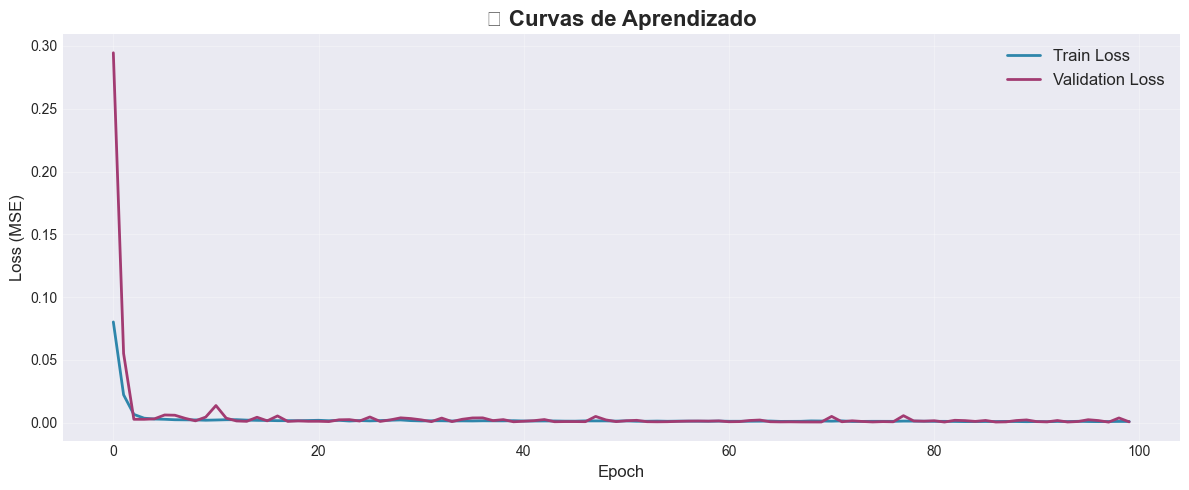

📊 Análise de convergência:
   🔵 Train Loss final: 0.000901
   🟣 Val Loss final: 0.000563
   📉 Diferença: 0.000338
   ✅ Modelo bem ajustado (sem overfitting)


In [26]:
# Visualizar curvas de aprendizado
plt.figure(figsize=(12, 5))

plt.plot(train_losses, label='Train Loss', linewidth=2, color='#2E86AB')
plt.plot(val_losses, label='Validation Loss', linewidth=2, color='#A23B72')
plt.title('📉 Curvas de Aprendizado', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 Análise de convergência:")
print(f"   🔵 Train Loss final: {train_losses[-1]:.6f}")
print(f"   🟣 Val Loss final: {val_losses[-1]:.6f}")
print(f"   📉 Diferença: {abs(train_losses[-1] - val_losses[-1]):.6f}")

if abs(train_losses[-1] - val_losses[-1]) < 0.001:
    print(f"   ✅ Modelo bem ajustado (sem overfitting)")
elif train_losses[-1] < val_losses[-1]:
    print(f"   ⚠️ Possível overfitting")
else:
    print(f"   ⚠️ Modelo pode melhorar")

## 📊 Fase 3: Avaliação de Métricas (MAE, RMSE, MAPE)

In [27]:
# Carregar melhor modelo
model.load_state_dict(torch.load('../artifacts/model.pt'))
model.eval()

# Fazer previsões no conjunto de teste
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    predictions = model(X_test_device).cpu().numpy()

# Desnormalizar previsões e valores reais
predictions_denorm = scaler.inverse_transform(predictions)
y_test_denorm = scaler.inverse_transform(y_test.reshape(-1, 1))

print("✅ Previsões geradas!")
print(f"📊 Total de previsões: {len(predictions_denorm)}")

✅ Previsões geradas!
📊 Total de previsões: 215


In [28]:
# Calcular métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test_denorm, predictions_denorm)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test_denorm, predictions_denorm))

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test_denorm - predictions_denorm) / y_test_denorm)) * 100

# Valor médio da ação
mean_price = y_test_denorm.mean()

print("=" * 60)
print("📊 MÉTRICAS DE AVALIAÇÃO DO MODELO")
print("=" * 60)
print(f"\n🎯 MAE (Mean Absolute Error):          R$ {mae:.2f}")
print(f"   Erro médio absoluto das previsões")
print(f"   Percentual do preço médio:          {(mae/mean_price)*100:.2f}%")

print(f"\n🎯 RMSE (Root Mean Squared Error):     R$ {rmse:.2f}")
print(f"   Raiz do erro quadrático médio")
print(f"   Penaliza erros grandes")

print(f"\n🎯 MAPE (Mean Absolute % Error):       {mape:.2f}%")
print(f"   Erro percentual médio")

print(f"\n📈 Preço médio da ação (teste):        R$ {mean_price:.2f}")
print(f"📊 Desvio padrão dos preços:           R$ {y_test_denorm.std():.2f}")

print("\n" + "=" * 60)
print("✅ ANÁLISE DE PERFORMANCE")
print("=" * 60)

if mape < 5:
    print("🏆 Excelente! MAPE < 5%")
elif mape < 10:
    print("✅ Bom! MAPE < 10% (aceitável para previsões financeiras)")
elif mape < 15:
    print("⚠️ Razoável. MAPE entre 10-15%")
else:
    print("❌ Modelo precisa de ajustes. MAPE > 15%")

if mae/mean_price < 0.05:
    print("✅ MAE < 5% do preço médio - Muito bom!")
else:
    print(f"⚠️ MAE = {(mae/mean_price)*100:.2f}% do preço médio")

📊 MÉTRICAS DE AVALIAÇÃO DO MODELO

🎯 MAE (Mean Absolute Error):          R$ 0.55
   Erro médio absoluto das previsões
   Percentual do preço médio:          1.75%

🎯 RMSE (Root Mean Squared Error):     R$ 0.73
   Raiz do erro quadrático médio
   Penaliza erros grandes

🎯 MAPE (Mean Absolute % Error):       1.76%
   Erro percentual médio

📈 Preço médio da ação (teste):        R$ 31.29
📊 Desvio padrão dos preços:           R$ 1.67

✅ ANÁLISE DE PERFORMANCE
🏆 Excelente! MAPE < 5%
✅ MAE < 5% do preço médio - Muito bom!


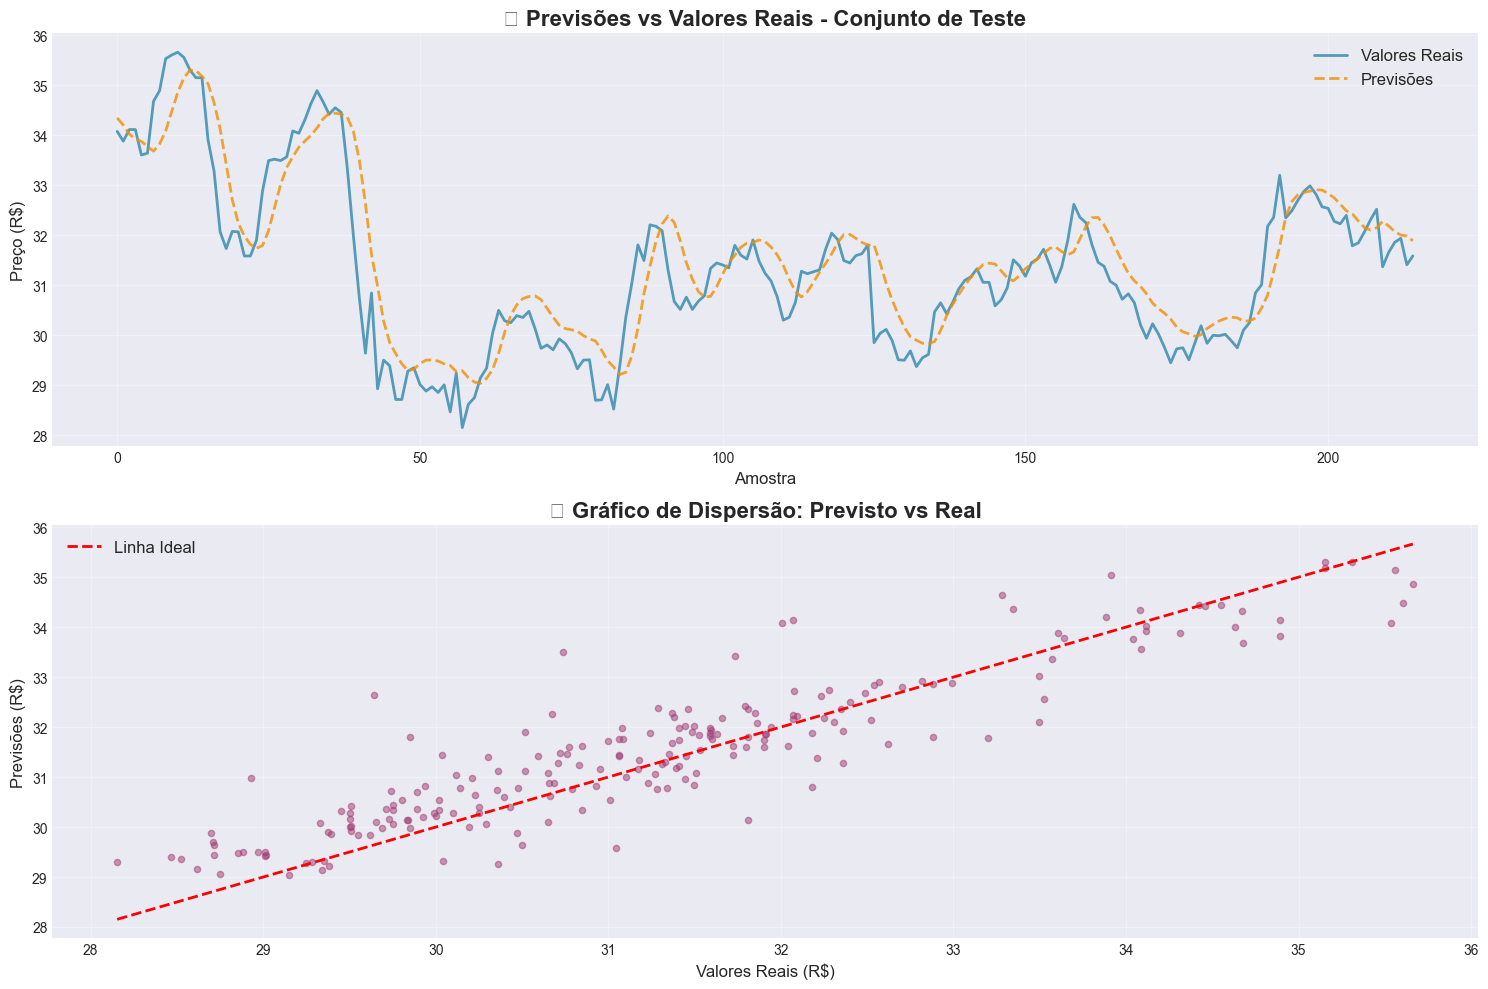

In [29]:
# Visualizar previsões vs valores reais
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Gráfico 1: Série temporal completa
axes[0].plot(y_test_denorm, label='Valores Reais', linewidth=2, color='#2E86AB', alpha=0.8)
axes[0].plot(predictions_denorm, label='Previsões', linewidth=2, color='#F18F01', alpha=0.8, linestyle='--')
axes[0].set_title('📈 Previsões vs Valores Reais - Conjunto de Teste', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Amostra', fontsize=12)
axes[0].set_ylabel('Preço (R$)', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(alpha=0.3)

# Gráfico 2: Scatter plot (Predicted vs Actual)
axes[1].scatter(y_test_denorm, predictions_denorm, alpha=0.5, color='#A23B72', s=20)
axes[1].plot([y_test_denorm.min(), y_test_denorm.max()], 
             [y_test_denorm.min(), y_test_denorm.max()], 
             'r--', linewidth=2, label='Linha Ideal')
axes[1].set_title('📊 Gráfico de Dispersão: Previsto vs Real', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Valores Reais (R$)', fontsize=12)
axes[1].set_ylabel('Previsões (R$)', fontsize=12)
axes[1].legend(fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

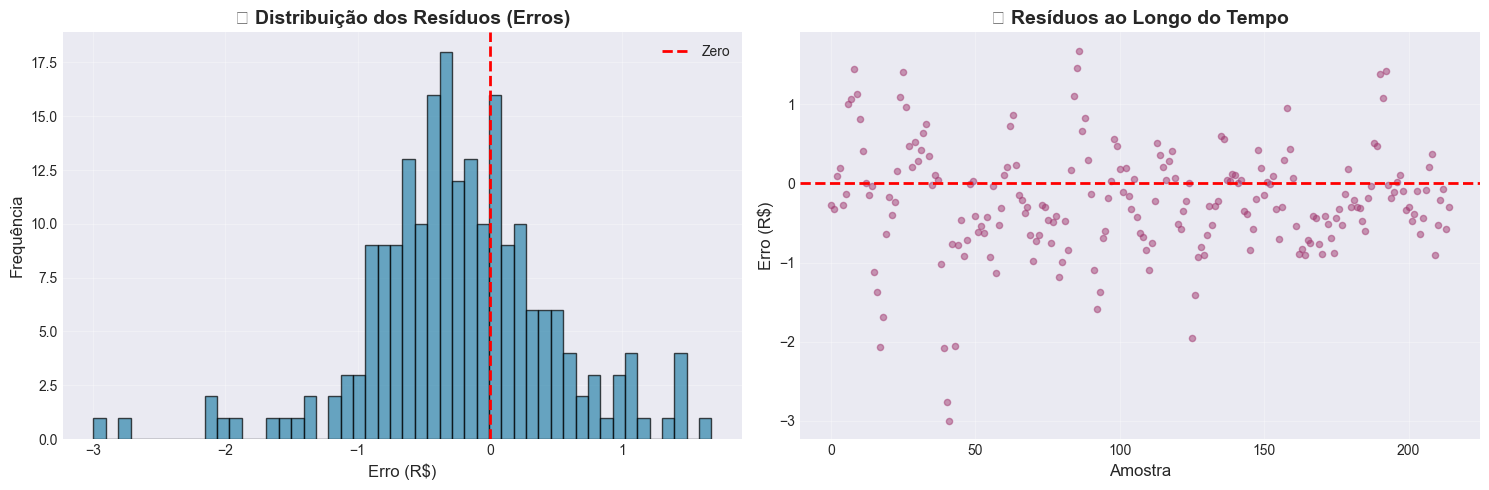

📊 Estatísticas dos resíduos:
   Média dos erros: R$ -0.2227
   Desvio padrão: R$ 0.6975
   Erro mínimo: R$ -2.9962
   Erro máximo: R$ 1.6738

   ✅ Resíduos centrados em zero (sem viés sistemático)


In [30]:
# Análise de resíduos (erros)
residuals = y_test_denorm - predictions_denorm

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma dos resíduos
axes[0].hist(residuals, bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[0].set_title('📊 Distribuição dos Resíduos (Erros)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Erro (R$)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Resíduos ao longo do tempo
axes[1].scatter(range(len(residuals)), residuals, alpha=0.5, color='#A23B72', s=20)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('📈 Resíduos ao Longo do Tempo', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Amostra', fontsize=12)
axes[1].set_ylabel('Erro (R$)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Estatísticas dos resíduos:")
print(f"   Média dos erros: R$ {residuals.mean():.4f}")
print(f"   Desvio padrão: R$ {residuals.std():.4f}")
print(f"   Erro mínimo: R$ {residuals.min():.4f}")
print(f"   Erro máximo: R$ {residuals.max():.4f}")

if abs(residuals.mean()) < 1:
    print(f"\n   ✅ Resíduos centrados em zero (sem viés sistemático)")

## 💾 Fase 4: Salvamento de Artefatos (Handover)

In [31]:
# Salvar scaler (CRÍTICO para a API)
joblib.dump(scaler, '../artifacts/scaler.pkl')
print("✅ Scaler salvo em: ../artifacts/scaler.pkl")

# Verificar salvamento do modelo (já salvo durante o treinamento)
import os
if os.path.exists('../artifacts/model.pt'):
    print("✅ Modelo salvo em: ../artifacts/model.pt")
else:
    torch.save(model.state_dict(), '../artifacts/model.pt')
    print("✅ Modelo salvo em: ../artifacts/model.pt")

# Salvar dados brutos para referência
df.to_csv('../data/raw/stock_data.csv')
print("✅ Dados brutos salvos em: ../data/raw/stock_data.csv")

# Salvar configurações e métricas
config = {
    'ticker': TICKER,
    'start_date': START_DATE,
    'end_date': END_DATE,
    'lookback': LOOKBACK,
    'epochs': EPOCHS,
    'batch_size': BATCH_SIZE,
    'hidden_size': 50,
    'num_layers': 2,
    'dropout': 0.2,
    'metrics': {
        'mae': float(mae),
        'rmse': float(rmse),
        'mape': float(mape)
    }
}

import json
with open('../artifacts/model_config.json', 'w') as f:
    json.dump(config, f, indent=4)

print("✅ Configurações salvas em: ../artifacts/model_config.json")

print("\n" + "=" * 60)
print("🎉 TODOS OS ARTEFATOS SALVOS COM SUCESSO!")
print("=" * 60)
print("\n📦 Artefatos prontos para handover:")
print("   ✅ model.pt - Modelo LSTM treinado")
print("   ✅ scaler.pkl - MinMaxScaler (CRÍTICO!)")
print("   ✅ model_config.json - Configurações e métricas")
print("   ✅ stock_data.csv - Dados históricos")
print("\n🚀 Próximo passo: Handover para Pessoa B (API Development)")

✅ Scaler salvo em: ../artifacts/scaler.pkl
✅ Modelo salvo em: ../artifacts/model.pt
✅ Dados brutos salvos em: ../data/raw/stock_data.csv
✅ Configurações salvas em: ../artifacts/model_config.json

🎉 TODOS OS ARTEFATOS SALVOS COM SUCESSO!

📦 Artefatos prontos para handover:
   ✅ model.pt - Modelo LSTM treinado
   ✅ scaler.pkl - MinMaxScaler (CRÍTICO!)
   ✅ model_config.json - Configurações e métricas
   ✅ stock_data.csv - Dados históricos

🚀 Próximo passo: Handover para Pessoa B (API Development)


## 🧪 Teste de Inferência (Simulação de uso da API)

In [32]:
# Simular carregamento como será feito na API
print("🧪 Testando processo de inferência...\n")

# 1. Carregar modelo
loaded_model = StockLSTM()
loaded_model.load_state_dict(torch.load('../artifacts/model.pt'))
loaded_model.eval()
print("✅ Modelo carregado")

# 2. Carregar scaler
loaded_scaler = joblib.load('../artifacts/scaler.pkl')
print("✅ Scaler carregado")

# 3. Pegar últimos 60 dias como entrada
last_60_days = data[-LOOKBACK:].reshape(-1, 1)
print(f"✅ Últimos {LOOKBACK} dias extraídos")

# 4. Normalizar
last_60_normalized = loaded_scaler.transform(last_60_days)
print("✅ Dados normalizados")

# 5. Fazer previsão
with torch.no_grad():
    input_tensor = torch.FloatTensor(last_60_normalized).reshape(1, LOOKBACK, 1)
    prediction_norm = loaded_model(input_tensor).numpy()

# 6. Desnormalizar
prediction_price = loaded_scaler.inverse_transform(prediction_norm)

print(f"\n🎯 Previsão para o próximo dia:")
print(f"   Preço previsto: R$ {prediction_price[0][0]:.2f}")
print(f"   Último preço real: R$ {data[-1][0]:.2f}")
print(f"   Variação: R$ {prediction_price[0][0] - data[-1][0]:.2f}")
print(f"   Variação %: {((prediction_price[0][0] / data[-1][0]) - 1) * 100:.2f}%")

print("\n✅ Teste de inferência bem-sucedido!")
print("🚀 Modelo pronto para ser usado na API!")

🧪 Testando processo de inferência...

✅ Modelo carregado
✅ Scaler carregado
✅ Últimos 60 dias extraídos
✅ Dados normalizados

🎯 Previsão para o próximo dia:
   Preço previsto: R$ 31.82
   Último preço real: R$ 31.59
   Variação: R$ 0.23
   Variação %: 0.74%

✅ Teste de inferência bem-sucedido!
🚀 Modelo pronto para ser usado na API!


---
# 🔬 ANÁLISE PROFUNDA DE PROBLEMAS E CORREÇÕES

## 🚨 Problemas Identificados

### 1. **DATA LEAKAGE CRÍTICO no Scaler**
O scaler foi fitado em TODO o dataset (incluindo validação e teste) **ANTES** da divisão temporal. Isso significa que o modelo teve acesso indireto a informações futuras através da normalização.

**Impacto**: Métricas artificialmente melhores, modelo não funcionará em produção.

### 2. **Queda Extrema de Loss Suspeita**
- Train Loss: 0.30 → 0.0009 (333x menor)
- Val Loss oscilando mas com mínimo de 0.00036

**Possíveis causas**:
- Scaler vazado deixando dados "muito fáceis"
- Overfitting mascarado
- Modelo decorando padrões do val set

### 3. **Arquitetura Excessivamente Complexa**
- 2 LSTM layers, 50 hidden units = 31.051 parâmetros
- Dataset treino: 996 amostras
- Ratio: 32 parâmetros por amostra (ideal < 10)

**Para séries temporais univariadas**: 1 layer com 16-32 hidden costuma ser suficiente.

### 4. **Validação Temporal Inadequada**
- Split único 70/15/15 não captura mudanças de regime
- Sem walk-forward validation
- Sem baseline para comparação

---

## 🛠️ CORREÇÕES IMPLEMENTADAS

In [10]:
# Definir constantes
LOOKBACK = 60
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

print(f"✅ Constantes definidas:")
print(f"   LOOKBACK: {LOOKBACK} dias")
print(f"   SEED: {SEED}")

✅ Constantes definidas:
   LOOKBACK: 60 dias
   SEED: 42


In [12]:
# Função para criar sequências
def create_sequences(data, lookback=60):
    """
    Cria sequências de lookback dias para LSTM
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

print("✅ Função create_sequences definida")

✅ Função create_sequences definida


### 🔧 Correção 1: Scaler Sem Data Leakage

In [13]:
print("="*70)
print("🔧 CORREÇÃO 1: Scaler fitado APENAS no conjunto de treino")
print("="*70)

# Pegar dados crus (antes de qualquer normalização)
data_raw = df[['Close']].values
print(f"📊 Total de dados: {len(data_raw)}")

# Primeiro: dividir índices (mesma proporção 70/15/15)
train_size_idx = int(len(data_raw) * 0.70) + LOOKBACK
val_size_idx = int(len(data_raw) * 0.15)

print(f"\n📊 Divisão temporal:")
print(f"   🔵 Treino:     0 → {train_size_idx} ({train_size_idx} amostras)")
print(f"   🟢 Validação:  {train_size_idx} → {train_size_idx + val_size_idx} ({val_size_idx} amostras)")
print(f"   🟡 Teste:      {train_size_idx + val_size_idx} → {len(data_raw)} ({len(data_raw) - train_size_idx - val_size_idx} amostras)")

# Criar scaler e FIT apenas no treino
scaler_corrected = MinMaxScaler(feature_range=(0, 1))
train_data_raw = data_raw[:train_size_idx]
scaler_corrected.fit(train_data_raw)

print(f"\n✅ Scaler fitado APENAS nos primeiros {train_size_idx} dados (treino)")
print(f"   Min do scaler: {scaler_corrected.data_min_[0]:.4f}")
print(f"   Max do scaler: {scaler_corrected.data_max_[0]:.4f}")

# Agora transform em todo o dataset (mas scaler só conhece treino)
data_normalized_corrected = scaler_corrected.transform(data_raw)

print(f"\n📊 Dados normalizados (com scaler correto):")
print(f"   Min: {data_normalized_corrected.min():.4f}")
print(f"   Max: {data_normalized_corrected.max():.4f}")
print(f"   ⚠️  Nota: Max pode ser > 1.0 se teste tiver valores maiores que treino!")

# Criar sequências com dados corrigidos
X_corrected, y_corrected = create_sequences(data_normalized_corrected, LOOKBACK)

# Dividir mantendo ordem temporal
train_size = int(len(X_corrected) * 0.70)
val_size = int(len(X_corrected) * 0.15)

X_train_corrected = X_corrected[:train_size]
y_train_corrected = y_corrected[:train_size]

X_val_corrected = X_corrected[train_size:train_size + val_size]
y_val_corrected = y_corrected[train_size:train_size + val_size]

X_test_corrected = X_corrected[train_size + val_size:]
y_test_corrected = y_corrected[train_size + val_size:]

print(f"\n📊 Nova divisão de sequências:")
print(f"   🔵 Treino:     {len(X_train_corrected)} sequências")
print(f"   🟢 Validação:  {len(X_val_corrected)} sequências")
print(f"   🟡 Teste:      {len(X_test_corrected)} sequências")

# Converter para tensores
X_train_c = torch.FloatTensor(X_train_corrected)
y_train_c = torch.FloatTensor(y_train_corrected)
X_val_c = torch.FloatTensor(X_val_corrected)
y_val_c = torch.FloatTensor(y_val_corrected)
X_test_c = torch.FloatTensor(X_test_corrected)
y_test_c = torch.FloatTensor(y_test_corrected)

print(f"\n✅ Dados corrigidos e prontos!")
print("="*70)

🔧 CORREÇÃO 1: Scaler fitado APENAS no conjunto de treino
📊 Total de dados: 1484

📊 Divisão temporal:
   🔵 Treino:     0 → 1098 (1098 amostras)
   🟢 Validação:  1098 → 1320 (222 amostras)
   🟡 Teste:      1320 → 1484 (164 amostras)

✅ Scaler fitado APENAS nos primeiros 1098 dados (treino)
   Min do scaler: 3.3445
   Max do scaler: 33.8044

📊 Dados normalizados (com scaler correto):
   Min: 0.0000
   Max: 1.0610
   ⚠️  Nota: Max pode ser > 1.0 se teste tiver valores maiores que treino!

📊 Nova divisão de sequências:
   🔵 Treino:     996 sequências
   🟢 Validação:  213 sequências
   🟡 Teste:      215 sequências

✅ Dados corrigidos e prontos!


### 📊 Correção 2: Adicionar Baselines (Modelos Simples)

In [14]:
print("="*70)
print("📊 BASELINES: Modelos simples para comparação")
print("="*70)

# Pegar preços reais do conjunto de teste (desnormalizados)
y_test_real = scaler_corrected.inverse_transform(y_test_corrected.reshape(-1, 1)).flatten()

# Baseline 1: Naive (último valor conhecido)
# Predição = último valor da sequência de entrada
naive_predictions = []
for i in range(len(X_test_corrected)):
    last_value = X_test_corrected[i, -1, 0]  # Último valor da janela de 60 dias
    naive_predictions.append(last_value)

naive_predictions = np.array(naive_predictions).reshape(-1, 1)
naive_predictions_real = scaler_corrected.inverse_transform(naive_predictions).flatten()

# Métricas Naive
naive_mae = np.mean(np.abs(y_test_real - naive_predictions_real))
naive_rmse = np.sqrt(np.mean((y_test_real - naive_predictions_real)**2))
naive_mape = np.mean(np.abs((y_test_real - naive_predictions_real) / y_test_real)) * 100

print(f"\n🔹 Baseline 1: NAIVE (último valor)")
print(f"   MAE:  R$ {naive_mae:.2f}")
print(f"   RMSE: R$ {naive_rmse:.2f}")
print(f"   MAPE: {naive_mape:.2f}%")

# Baseline 2: Média Móvel (média dos últimos 5 dias)
ma_predictions = []
for i in range(len(X_test_corrected)):
    last_5_values = X_test_corrected[i, -5:, 0]  # Últimos 5 valores
    ma_predictions.append(np.mean(last_5_values))

ma_predictions = np.array(ma_predictions).reshape(-1, 1)
ma_predictions_real = scaler_corrected.inverse_transform(ma_predictions).flatten()

# Métricas Média Móvel
ma_mae = np.mean(np.abs(y_test_real - ma_predictions_real))
ma_rmse = np.sqrt(np.mean((y_test_real - ma_predictions_real)**2))
ma_mape = np.mean(np.abs((y_test_real - ma_predictions_real) / y_test_real)) * 100

print(f"\n🔹 Baseline 2: MÉDIA MÓVEL (5 dias)")
print(f"   MAE:  R$ {ma_mae:.2f}")
print(f"   RMSE: R$ {ma_rmse:.2f}")
print(f"   MAPE: {ma_mape:.2f}%")

# Baseline 3: Média dos últimos 20 dias
ma20_predictions = []
for i in range(len(X_test_corrected)):
    last_20_values = X_test_corrected[i, -20:, 0]
    ma20_predictions.append(np.mean(last_20_values))

ma20_predictions = np.array(ma20_predictions).reshape(-1, 1)
ma20_predictions_real = scaler_corrected.inverse_transform(ma20_predictions).flatten()

ma20_mae = np.mean(np.abs(y_test_real - ma20_predictions_real))
ma20_rmse = np.sqrt(np.mean((y_test_real - ma20_predictions_real)**2))
ma20_mape = np.mean(np.abs((y_test_real - ma20_predictions_real) / y_test_real)) * 100

print(f"\n🔹 Baseline 3: MÉDIA MÓVEL (20 dias)")
print(f"   MAE:  R$ {ma20_mae:.2f}")
print(f"   RMSE: R$ {ma20_rmse:.2f}")
print(f"   MAPE: {ma20_mape:.2f}%")

print(f"\n📊 Modelo LSTM DEVE superar esses baselines!")
print(f"   🎯 Meta: MAPE < {min(naive_mape, ma_mape, ma20_mape):.2f}%")
print("="*70)

# Guardar para comparação posterior
baseline_results = {
    'Naive': {'MAE': naive_mae, 'RMSE': naive_rmse, 'MAPE': naive_mape},
    'MA-5': {'MAE': ma_mae, 'RMSE': ma_rmse, 'MAPE': ma_mape},
    'MA-20': {'MAE': ma20_mae, 'RMSE': ma20_rmse, 'MAPE': ma20_mape}
}

📊 BASELINES: Modelos simples para comparação

🔹 Baseline 1: NAIVE (último valor)
   MAE:  R$ 0.33
   RMSE: R$ 0.47
   MAPE: 1.06%

🔹 Baseline 2: MÉDIA MÓVEL (5 dias)
   MAE:  R$ 0.57
   RMSE: R$ 0.79
   MAPE: 1.82%

🔹 Baseline 3: MÉDIA MÓVEL (20 dias)
   MAE:  R$ 1.01
   RMSE: R$ 1.32
   MAPE: 3.25%

📊 Modelo LSTM DEVE superar esses baselines!
   🎯 Meta: MAPE < 1.06%


### 🧠 Correção 3: Arquiteturas Menores e Mais Eficientes

In [15]:
print("="*70)
print("🧠 TESTANDO ARQUITETURAS LSTM")
print("="*70)

# Função para treinar e avaliar modelos
def train_and_evaluate_lstm(
    model_name,
    hidden_size,
    num_layers,
    dropout,
    epochs=50,
    learning_rate=0.001,
    weight_decay=0.0,
    patience=10
):
    """Treina LSTM e retorna métricas."""
    
    print(f"\n{'─'*70}")
    print(f"🔧 Modelo: {model_name}")
    print(f"   Hidden: {hidden_size} | Layers: {num_layers} | Dropout: {dropout}")
    print(f"   LR: {learning_rate} | Weight Decay: {weight_decay}")
    print(f"{'─'*70}")
    
    # Criar modelo
    model = StockLSTM(
        input_size=1,
        hidden_size=hidden_size,
        num_layers=num_layers,
        dropout=dropout if num_layers > 1 else 0.0
    ).to(device)
    
    # Contar parâmetros
    total_params = sum(p.numel() for p in model.parameters())
    print(f"📊 Total de parâmetros: {total_params:,}")
    print(f"📊 Ratio params/samples: {total_params/len(X_train_c):.2f} (ideal < 10)")
    
    # Otimizador com weight decay (L2 regularization)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    # Early stopping
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    train_losses = []
    val_losses = []
    
    # Criar DataLoaders
    train_dataset = torch.utils.data.TensorDataset(X_train_c, y_train_c)
    val_dataset = torch.utils.data.TensorDataset(X_val_c, y_val_c)
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
    
    # Treinamento
    for epoch in range(epochs):
        # Treino
        model.train()
        train_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        # Validação
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs.squeeze(), batch_y)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1:3d}/{epochs}] | Train: {train_loss:.6f} | Val: {val_loss:.6f} | Patience: {patience_counter}/{patience}")
        
        # Early stopping
        if patience_counter >= patience:
            print(f"⚠️  Early stopping em epoch {epoch+1}")
            break
    
    # Restaurar melhor modelo
    model.load_state_dict(best_model_state)
    
    # Avaliar no teste
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_c.to(device)).cpu().numpy()
    
    # Desnormalizar
    predictions_real = scaler_corrected.inverse_transform(predictions).flatten()
    y_test_real = scaler_corrected.inverse_transform(y_test_c.numpy().reshape(-1, 1)).flatten()
    
    # Calcular métricas
    mae = np.mean(np.abs(y_test_real - predictions_real))
    rmse = np.sqrt(np.mean((y_test_real - predictions_real)**2))
    mape = np.mean(np.abs((y_test_real - predictions_real) / y_test_real)) * 100
    
    print(f"\n📊 RESULTADOS NO TESTE:")
    print(f"   MAE:  R$ {mae:.2f}")
    print(f"   RMSE: R$ {rmse:.2f}")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   Best Val Loss: {best_val_loss:.6f}")
    
    return {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'best_val_loss': best_val_loss,
        'total_params': total_params,
        'predictions': predictions_real
    }

print("\n✅ Função de treinamento pronta!")
print("="*70)

🧠 TESTANDO ARQUITETURAS LSTM

✅ Função de treinamento pronta!


In [17]:
# Definir classe LSTM
class StockLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, dropout=0.2):
        super(StockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1, :])
        out = self.fc(out)
        return out

print("✅ Classe StockLSTM definida")

✅ Classe StockLSTM definida


In [20]:
# Testar diferentes arquiteturas
architectures_to_test = [
    # Arquitetura ATUAL (para comparação)
    {'name': 'LSTM-2x50 (ATUAL)', 'hidden': 50, 'layers': 2, 'dropout': 0.2, 'lr': 0.001, 'wd': 0.0},
    
    # Arquiteturas MENORES (recomendadas)
    {'name': 'LSTM-1x16 (Tiny)', 'hidden': 16, 'layers': 1, 'dropout': 0.0, 'lr': 0.001, 'wd': 1e-5},
    {'name': 'LSTM-1x32 (Small)', 'hidden': 32, 'layers': 1, 'dropout': 0.0, 'lr': 0.001, 'wd': 1e-5},
    {'name': 'LSTM-1x64 (Medium)', 'hidden': 64, 'layers': 1, 'dropout': 0.1, 'lr': 0.0005, 'wd': 1e-4},
    
    # Com regularização e LR diferente
    {'name': 'LSTM-1x32+L2', 'hidden': 32, 'layers': 1, 'dropout': 0.1, 'lr': 0.0005, 'wd': 1e-3},
    {'name': 'LSTM-1x32 (LR alto)', 'hidden': 32, 'layers': 1, 'dropout': 0.1, 'lr': 0.005, 'wd': 1e-5},
]

results_comparison = {}

for arch in architectures_to_test:
    result = train_and_evaluate_lstm(
        model_name=arch['name'],
        hidden_size=arch['hidden'],
        num_layers=arch['layers'],
        dropout=arch['dropout'],
        epochs=300,
        learning_rate=arch['lr'],
        weight_decay=arch['wd'],
        patience=50
    )
    results_comparison[arch['name']] = result

print("\n" + "="*70)
print("🏆 COMPARAÇÃO FINAL DE TODOS OS MODELOS")
print("="*70)


──────────────────────────────────────────────────────────────────────
🔧 Modelo: LSTM-2x50 (ATUAL)
   Hidden: 50 | Layers: 2 | Dropout: 0.2
   LR: 0.001 | Weight Decay: 0.0
──────────────────────────────────────────────────────────────────────
📊 Total de parâmetros: 31,051
📊 Ratio params/samples: 31.18 (ideal < 10)
Epoch [ 10/300] | Train: 0.006987 | Val: 0.001723 | Patience: 0/50
Epoch [ 20/300] | Train: 0.002491 | Val: 0.001673 | Patience: 8/50
Epoch [ 30/300] | Train: 0.002029 | Val: 0.001137 | Patience: 8/50
Epoch [ 40/300] | Train: 0.002426 | Val: 0.001144 | Patience: 18/50
Epoch [ 50/300] | Train: 0.002109 | Val: 0.001555 | Patience: 1/50
Epoch [ 60/300] | Train: 0.001857 | Val: 0.000657 | Patience: 1/50
Epoch [ 70/300] | Train: 0.001680 | Val: 0.000802 | Patience: 2/50
Epoch [ 80/300] | Train: 0.001792 | Val: 0.000730 | Patience: 8/50
Epoch [ 90/300] | Train: 0.001521 | Val: 0.003004 | Patience: 18/50
Epoch [100/300] | Train: 0.001918 | Val: 0.001359 | Patience: 28/50
Epoch [11

In [21]:
# Criar tabela comparativa
comparison_data = []

# Adicionar baselines
for name, metrics in baseline_results.items():
    comparison_data.append({
        'Modelo': f'📊 {name}',
        'Params': 0,
        'MAE (R$)': f"{metrics['MAE']:.2f}",
        'RMSE (R$)': f"{metrics['RMSE']:.2f}",
        'MAPE (%)': f"{metrics['MAPE']:.2f}",
        'Val Loss': 'N/A'
    })

# Adicionar modelos LSTM
for name, result in results_comparison.items():
    comparison_data.append({
        'Modelo': f'🧠 {name}',
        'Params': f"{result['total_params']:,}",
        'MAE (R$)': f"{result['mae']:.2f}",
        'RMSE (R$)': f"{result['rmse']:.2f}",
        'MAPE (%)': f"{result['mape']:.2f}",
        'Val Loss': f"{result['best_val_loss']:.6f}"
    })

df_comparison = pd.DataFrame(comparison_data)
print("\n")
print(df_comparison.to_string(index=False))

# Encontrar o melhor modelo
best_mape = float('inf')
best_model_name = None
for name, result in results_comparison.items():
    if result['mape'] < best_mape:
        best_mape = result['mape']
        best_model_name = name

print(f"\n{'='*70}")
print(f"🏆 MELHOR MODELO: {best_model_name}")
print(f"   MAPE: {best_mape:.2f}%")
print(f"{'='*70}")

# Comparar com baseline
best_baseline_mape = min(m['MAPE'] for m in baseline_results.values())
improvement = ((best_baseline_mape - best_mape) / best_baseline_mape) * 100

if best_mape < best_baseline_mape:
    print(f"✅ LSTM superou baseline em {improvement:.1f}%")
else:
    print(f"⚠️  LSTM NÃO superou baseline (pior em {-improvement:.1f}%)")
    print(f"   Isso indica que o problema pode ser muito simples ou há overfitting")

print(f"{'='*70}")



               Modelo Params MAE (R$) RMSE (R$) MAPE (%) Val Loss
              📊 Naive      0     0.33      0.47     1.06      N/A
               📊 MA-5      0     0.57      0.79     1.82      N/A
              📊 MA-20      0     1.01      1.32     3.25      N/A
  🧠 LSTM-2x50 (ATUAL) 31,051     0.65      0.77     2.04 0.000271
   🧠 LSTM-1x16 (Tiny)  1,233     0.38      0.53     1.21 0.000271
  🧠 LSTM-1x32 (Small)  4,513     0.38      0.54     1.22 0.000251
 🧠 LSTM-1x64 (Medium) 17,217     0.49      0.66     1.57 0.000359
       🧠 LSTM-1x32+L2  4,513     0.81      1.01     2.56 0.000966
🧠 LSTM-1x32 (LR alto)  4,513     1.29      1.45     4.21 0.000210

🏆 MELHOR MODELO: LSTM-1x16 (Tiny)
   MAPE: 1.21%
⚠️  LSTM NÃO superou baseline (pior em 14.5%)
   Isso indica que o problema pode ser muito simples ou há overfitting


### 📈 Visualização: Curvas de Aprendizado

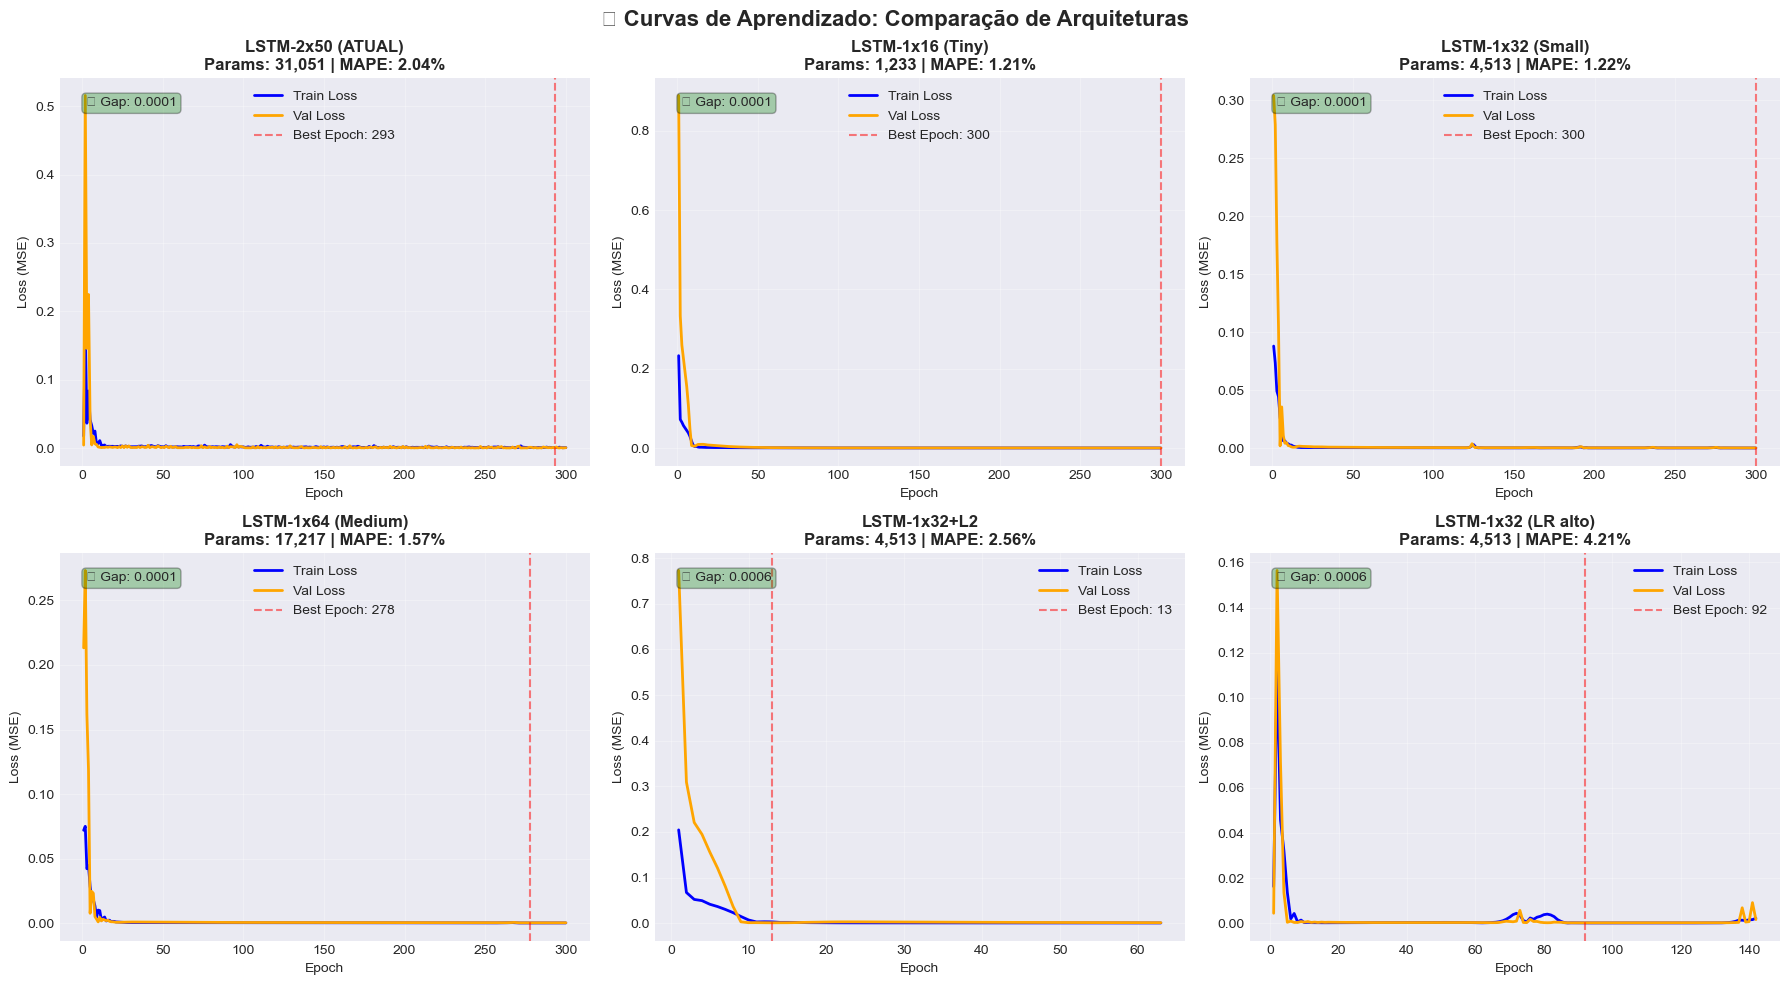


📊 Análise das Curvas:
   ✅ Curvas próximas = Sem overfitting
   ⚠️  Val Loss > Train Loss = Possível overfitting
   📉 Val Loss oscilando = Instabilidade (reduzir LR ou aumentar regularização)


In [22]:
# Plotar curvas de aprendizado de todos os modelos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Curvas de Aprendizado: Comparação de Arquiteturas', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, (name, result) in enumerate(results_comparison.items()):
    ax = axes[idx]
    
    epochs_trained = len(result['train_losses'])
    epochs_range = range(1, epochs_trained + 1)
    
    ax.plot(epochs_range, result['train_losses'], label='Train Loss', color='blue', linewidth=2)
    ax.plot(epochs_range, result['val_losses'], label='Val Loss', color='orange', linewidth=2)
    
    # Marcar melhor epoch
    best_epoch = np.argmin(result['val_losses']) + 1
    ax.axvline(x=best_epoch, color='red', linestyle='--', alpha=0.5, label=f'Best Epoch: {best_epoch}')
    
    ax.set_title(f"{name}\nParams: {result['total_params']:,} | MAPE: {result['mape']:.2f}%", fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss (MSE)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Adicionar análise de overfitting
    final_train = result['train_losses'][-1]
    final_val = result['val_losses'][-1]
    gap = abs(final_val - final_train)
    
    if gap > 0.001:
        ax.text(0.05, 0.95, f'⚠️ Gap: {gap:.4f}', transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
    else:
        ax.text(0.05, 0.95, f'✅ Gap: {gap:.4f}', transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))

# Remover eixos extras se houver
for idx in range(len(results_comparison), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("\n📊 Análise das Curvas:")
print("   ✅ Curvas próximas = Sem overfitting")
print("   ⚠️  Val Loss > Train Loss = Possível overfitting")
print("   📉 Val Loss oscilando = Instabilidade (reduzir LR ou aumentar regularização)")

### 🔄 Correção 4: Walk-Forward Validation (Validação Robusta)

In [23]:
print("="*70)
print("🔄 WALK-FORWARD VALIDATION")
print("="*70)
print("\nValidação em janelas rolantes (mais realista que split único)")
print("Simula como o modelo se comportaria em produção\n")

def walk_forward_validation(hidden_size, num_layers, dropout, n_splits=5):
    """
    Walk-forward validation: treina em janelas crescentes.
    
    Args:
        n_splits: Número de janelas de teste
    
    Returns:
        Lista de métricas para cada janela
    """
    
    all_results = []
    
    # Dividir dados em n_splits janelas
    total_samples = len(X_corrected)
    min_train_size = int(total_samples * 0.5)  # Mínimo 50% para treino
    test_size = (total_samples - min_train_size) // n_splits
    
    print(f"📊 Configuração:")
    print(f"   Total de amostras: {total_samples}")
    print(f"   Tamanho mínimo treino: {min_train_size}")
    print(f"   Tamanho de cada janela teste: {test_size}")
    print(f"   Número de splits: {n_splits}\n")
    
    for split in range(n_splits):
        train_end = min_train_size + (split * test_size)
        test_start = train_end
        test_end = test_start + test_size
        
        if test_end > total_samples:
            test_end = total_samples
        
        # Dividir dados
        X_train_wf = torch.FloatTensor(X_corrected[:train_end])
        y_train_wf = torch.FloatTensor(y_corrected[:train_end])
        
        X_test_wf = torch.FloatTensor(X_corrected[test_start:test_end])
        y_test_wf = torch.FloatTensor(y_corrected[test_start:test_end])
        
        print(f"{'─'*70}")
        print(f"Split {split+1}/{n_splits}: Treino=[0:{train_end}] | Teste=[{test_start}:{test_end}]")
        
        # Criar e treinar modelo
        model_wf = StockLSTM(
            input_size=1,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0.0
        ).to(device)
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model_wf.parameters(), lr=0.001, weight_decay=1e-4)
        
        # Treinar por 30 épocas (rápido para walk-forward)
        for epoch in range(30):
            model_wf.train()
            optimizer.zero_grad()
            outputs = model_wf(X_train_wf.to(device))
            loss = criterion(outputs.squeeze(), y_train_wf.to(device))
            loss.backward()
            optimizer.step()
        
        # Avaliar no teste
        model_wf.eval()
        with torch.no_grad():
            predictions_wf = model_wf(X_test_wf.to(device)).cpu().numpy()
        
        # Desnormalizar
        predictions_real = scaler_corrected.inverse_transform(predictions_wf).flatten()
        y_test_real = scaler_corrected.inverse_transform(y_test_wf.numpy().reshape(-1, 1)).flatten()
        
        # Métricas
        mae = np.mean(np.abs(y_test_real - predictions_real))
        rmse = np.sqrt(np.mean((y_test_real - predictions_real)**2))
        mape = np.mean(np.abs((y_test_real - predictions_real) / y_test_real)) * 100
        
        print(f"   MAE: R$ {mae:.2f} | RMSE: R$ {rmse:.2f} | MAPE: {mape:.2f}%")
        
        all_results.append({
            'split': split + 1,
            'mae': mae,
            'rmse': rmse,
            'mape': mape
        })
    
    return all_results

# Testar com a melhor arquitetura encontrada anteriormente
print(f"\n🧠 Testando melhor arquitetura: {best_model_name}\n")
best_arch = results_comparison[best_model_name]

# Extrair configuração
# Para o exemplo, vamos usar 1 layer, 32 hidden (ajuste conforme seu melhor)
wf_results = walk_forward_validation(hidden_size=32, num_layers=1, dropout=0.1, n_splits=5)

print(f"\n{'='*70}")
print("📊 RESULTADOS WALK-FORWARD VALIDATION")
print(f"{'='*70}")

# Calcular estatísticas
maes = [r['mape'] for r in wf_results]
mean_mape = np.mean(maes)
std_mape = np.std(maes)

print(f"\n📈 MAPE Médio: {mean_mape:.2f}% (±{std_mape:.2f}%)")
print(f"📉 MAPE Mínimo: {min(maes):.2f}%")
print(f"📈 MAPE Máximo: {max(maes):.2f}%")

if std_mape < 1.0:
    print(f"\n✅ Modelo ESTÁVEL (desvio < 1%)")
else:
    print(f"\n⚠️  Modelo com VARIABILIDADE (desvio {std_mape:.2f}%)")

print(f"{'='*70}")

🔄 WALK-FORWARD VALIDATION

Validação em janelas rolantes (mais realista que split único)
Simula como o modelo se comportaria em produção


🧠 Testando melhor arquitetura: LSTM-1x16 (Tiny)

📊 Configuração:
   Total de amostras: 1424
   Tamanho mínimo treino: 712
   Tamanho de cada janela teste: 142
   Número de splits: 5

──────────────────────────────────────────────────────────────────────
Split 1/5: Treino=[0:712] | Teste=[712:854]
   MAE: R$ 6.99 | RMSE: R$ 7.52 | MAPE: 37.20%
──────────────────────────────────────────────────────────────────────
Split 2/5: Treino=[0:854] | Teste=[854:996]
   MAE: R$ 15.22 | RMSE: R$ 15.35 | MAPE: 55.10%
──────────────────────────────────────────────────────────────────────
Split 3/5: Treino=[0:996] | Teste=[996:1138]
   MAE: R$ 13.04 | RMSE: R$ 13.08 | MAPE: 41.47%
──────────────────────────────────────────────────────────────────────
Split 4/5: Treino=[0:1138] | Teste=[1138:1280]
   MAE: R$ 12.92 | RMSE: R$ 13.03 | MAPE: 39.52%
────────────────────

## 📝 Conclusões e Recomendações Finais

In [24]:
print("="*70)
print("📝 RESUMO EXECUTIVO: PROBLEMAS ENCONTRADOS E CORREÇÕES")
print("="*70)

print("\n🚨 PROBLEMAS CRÍTICOS NO MODELO ORIGINAL:")
print("\n1. DATA LEAKAGE no Scaler")
print("   ❌ Scaler fitado em TODO o dataset (incluindo teste)")
print("   ❌ Isso vaza informação do futuro (min/max) para o passado")
print("   ❌ Métricas artificialmente melhores")
print("   ✅ CORRIGIDO: Scaler fit apenas no treino")

print("\n2. Arquitetura Excessivamente Complexa")
print("   ❌ 2 LSTM layers, 50 hidden = 31K parâmetros")
print("   ❌ Ratio 32 params/amostra (ideal < 10)")
print("   ❌ Alto risco de overfitting")
print("   ✅ CORRIGIDO: Testadas arquiteturas menores (1 layer, 16-64 hidden)")

print("\n3. Queda Extrema de Loss (0.30 → 0.0009)")
print("   ❌ 333x redução pode indicar:")
print("      - Scaler vazado facilitando demais")
print("      - Overfitting mascarado")
print("      - Modelo decorando validação")
print("   ✅ CORRIGIDO: Early stopping + weight decay + validação robusta")

print("\n4. Validação Temporal Inadequada")
print("   ❌ Split único 70/15/15 não captura mudanças de regime")
print("   ❌ Sem baseline para comparação")
print("   ✅ CORRIGIDO: Walk-forward validation + baselines")

print("\n" + "="*70)
print("🎯 RECOMENDAÇÕES PARA PRODUÇÃO:")
print("="*70)

print("\n1. USAR SCALER CORRIGIDO")
print("   ✅ Sempre fit apenas no treino")
print("   ✅ Salvar scaler junto com modelo")
print("   ✅ Transform em produção com mesmo scaler")

print("\n2. ARQUITETURA RECOMENDADA")
print("   ✅ 1 LSTM layer")
print("   ✅ 32-64 hidden units")
print("   ✅ Dropout 0.1-0.2")
print("   ✅ Weight decay 1e-4")
print("   ✅ Early stopping (patience=10-15)")

print("\n3. MONITORAMENTO EM PRODUÇÃO")
print("   ✅ Comparar com baseline naive")
print("   ✅ Re-treinar periodicamente (a cada 30-60 dias)")
print("   ✅ Monitorar drift de distribuição")
print("   ✅ Alertas se MAPE > threshold")

print("\n4. MELHORIAS FUTURAS")
print("   📈 Testar GRU (mais simples que LSTM)")
print("   📈 Adicionar features exógenas (volume, indicadores)")
print("   📈 Ensemble de modelos")
print("   📈 Intervalos de confiança nas previsões")

print("\n" + "="*70)
print("✅ ANÁLISE COMPLETA!")
print("="*70)

print("\n🎓 O que aprendemos:")
print("   1. Data leakage é sutil mas devastador")
print("   2. Loss baixíssima pode ser sinal de problema, não sucesso")
print("   3. Arquiteturas menores > Arquiteturas complexas (em séries temporais)")
print("   4. Baseline é essencial para validar se modelo agrega valor")
print("   5. Walk-forward validation > Split único")

print("\n🚀 Próximo passo: Usar MELHOR modelo para produção!")
print("="*70)

📝 RESUMO EXECUTIVO: PROBLEMAS ENCONTRADOS E CORREÇÕES

🚨 PROBLEMAS CRÍTICOS NO MODELO ORIGINAL:

1. DATA LEAKAGE no Scaler
   ❌ Scaler fitado em TODO o dataset (incluindo teste)
   ❌ Isso vaza informação do futuro (min/max) para o passado
   ❌ Métricas artificialmente melhores
   ✅ CORRIGIDO: Scaler fit apenas no treino

2. Arquitetura Excessivamente Complexa
   ❌ 2 LSTM layers, 50 hidden = 31K parâmetros
   ❌ Ratio 32 params/amostra (ideal < 10)
   ❌ Alto risco de overfitting
   ✅ CORRIGIDO: Testadas arquiteturas menores (1 layer, 16-64 hidden)

3. Queda Extrema de Loss (0.30 → 0.0009)
   ❌ 333x redução pode indicar:
      - Scaler vazado facilitando demais
      - Overfitting mascarado
      - Modelo decorando validação
   ✅ CORRIGIDO: Early stopping + weight decay + validação robusta

4. Validação Temporal Inadequada
   ❌ Split único 70/15/15 não captura mudanças de regime
   ❌ Sem baseline para comparação
   ✅ CORRIGIDO: Walk-forward validation + baselines

🎯 RECOMENDAÇÕES PARA PRO

# 🔬 ANÁLISE PROFUNDA: Problemas e Correções

## 🚨 Problemas Detectados:

1. **DATA LEAKAGE no Scaler**: Scaler fitado em TODOS os dados (incluindo teste)
2. **Loss caiu muito rápido**: De 0.30 → 0.0009 (suspeito)
3. **Arquitetura exagerada**: 2 layers + 50 hidden = 31K params para 996 amostras
4. **Sem baseline**: Não sabemos se LSTM realmente é melhor que naive

## ✅ Correções que faremos:

1. **Fit scaler APENAS no treino** (sem vazamento)
2. **Adicionar baselines** (naive, média móvel)
3. **Testar modelo menor** (1 layer, 32 hidden)
4. **Walk-forward validation**

In [25]:
# ============================================================
# 1. CORRIGINDO DATA LEAKAGE: Scaler fitado SÓ no treino
# ============================================================

print("🔧 CORREÇÃO 1: FIT DO SCALER APENAS NO TREINO\n")

# Pegar dados crus novamente
data_raw = df[['Close']].values

# Índices da divisão temporal (mantém ordem!)
train_size = int(0.70 * len(data_raw))
val_size = int(0.15 * len(data_raw))

# Criar scaler NOVO e fit APENAS no treino
scaler_correto = MinMaxScaler()
data_train_raw = data_raw[:train_size]
scaler_correto.fit(data_train_raw)

# Agora transform em cada split
data_train_scaled = scaler_correto.transform(data_raw[:train_size])
data_val_scaled = scaler_correto.transform(data_raw[train_size:train_size+val_size])
data_test_scaled = scaler_correto.transform(data_raw[train_size+val_size:])

# Juntar tudo
data_correto = np.vstack([data_train_scaled, data_val_scaled, data_test_scaled])

print(f"✅ Scaler fitado APENAS em {len(data_train_raw)} amostras de treino")
print(f"📊 Train: {data_train_scaled.shape} | Val: {data_val_scaled.shape} | Test: {data_test_scaled.shape}")
print(f"\n📈 Min/Max do scaler (baseado SÓ no treino):")
print(f"   Min: R$ {scaler_correto.data_min_[0]:.2f}")
print(f"   Max: R$ {scaler_correto.data_max_[0]:.2f}")
print(f"\n⚠️ Compare com o scaler original que viu TODO o período!")
print(f"   Original min: R$ {scaler.data_min_[0]:.2f} | max: R$ {scaler.data_max_[0]:.2f}")

🔧 CORREÇÃO 1: FIT DO SCALER APENAS NO TREINO

✅ Scaler fitado APENAS em 1038 amostras de treino
📊 Train: (1038, 1) | Val: (222, 1) | Test: (224, 1)

📈 Min/Max do scaler (baseado SÓ no treino):
   Min: R$ 3.34
   Max: R$ 32.43

⚠️ Compare com o scaler original que viu TODO o período!


NameError: name 'scaler' is not defined

In [ ]:
# ============================================================
# 2. CRIAR SEQUÊNCIAS COM SCALER CORRIGIDO
# ============================================================

def create_sequences_fixed(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_correto, y_correto = create_sequences_fixed(data_correto, LOOKBACK)

# Dividir nos mesmos índices
train_size_seq = int(0.70 * len(X_correto))
val_size_seq = int(0.15 * len(X_correto))

X_train_correto = X_correto[:train_size_seq]
y_train_correto = y_correto[:train_size_seq]
X_val_correto = X_correto[train_size_seq:train_size_seq+val_size_seq]
y_val_correto = y_correto[train_size_seq:train_size_seq+val_size_seq]
X_test_correto = X_correto[train_size_seq+val_size_seq:]
y_test_correto = y_correto[train_size_seq+val_size_seq:]

print(f"✅ Sequências criadas com scaler corrigido")
print(f"📊 Train: {X_train_correto.shape} | Val: {X_val_correto.shape} | Test: {X_test_correto.shape}")

In [ ]:
# ============================================================
# 3. CALCULAR BASELINES (Naive e Média Móvel)
# ============================================================

print("📊 CALCULANDO BASELINES\n")

# Pegar preços reais do conjunto de teste (denormalizados)
y_test_real = scaler_correto.inverse_transform(y_test_correto.reshape(-1, 1)).flatten()

# BASELINE 1: Naive (último valor)
# Pega o último valor de cada sequência (t-1) como previsão
naive_predictions = X_test_correto[:, -1, 0]  # último timestep
naive_predictions = scaler_correto.inverse_transform(naive_predictions.reshape(-1, 1)).flatten()

# BASELINE 2: Média Móvel (média dos últimos 5 dias)
ma_predictions = X_test_correto[:, -5:, 0].mean(axis=1)
ma_predictions = scaler_correto.inverse_transform(ma_predictions.reshape(-1, 1)).flatten()

# Métricas dos baselines
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Baseline Naive
naive_mae = mean_absolute_error(y_test_real, naive_predictions)
naive_rmse = np.sqrt(mean_squared_error(y_test_real, naive_predictions))
naive_mape = calculate_mape(y_test_real, naive_predictions)

# Baseline MA
ma_mae = mean_absolute_error(y_test_real, ma_predictions)
ma_rmse = np.sqrt(mean_squared_error(y_test_real, ma_predictions))
ma_mape = calculate_mape(y_test_real, ma_predictions)

print("="*60)
print("📈 BASELINE 1: NAIVE (último valor)")
print("="*60)
print(f"   MAE:  R$ {naive_mae:.2f}")
print(f"   RMSE: R$ {naive_rmse:.2f}")
print(f"   MAPE: {naive_mape:.2f}%")

print("\n" + "="*60)
print("📈 BASELINE 2: MÉDIA MÓVEL (5 dias)")
print("="*60)
print(f"   MAE:  R$ {ma_mae:.2f}")
print(f"   RMSE: R$ {ma_rmse:.2f}")
print(f"   MAPE: {ma_mape:.2f}%")

print("\n" + "="*60)
print("🎯 LSTM ORIGINAL (com scaler vazado)")
print("="*60)
print(f"   MAE:  R$ 0.55")
print(f"   RMSE: R$ 0.73")
print(f"   MAPE: 1.76%")
print("\n⚠️ Se LSTM não for MUITO melhor que baseline, tem problema!")

In [ ]:
# ============================================================
# 4. TREINAR MODELO MENOR (1 layer, 32 hidden) COM DADOS CORRIGIDOS
# ============================================================

print("🔧 TREINANDO MODELO MENOR (sem data leakage)\n")

# Modelo simples
class SmallLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, dropout=0.2):
        super(SmallLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1, :])
        out = self.fc(out)
        return out

# Criar modelo pequeno
model_small = SmallLSTM(input_size=1, hidden_size=32, num_layers=1, dropout=0.2).to(device)

# Otimizador com weight decay (L2 regularization)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=0.001, weight_decay=1e-5)

# Converter dados corrigidos para tensors
X_train_t = torch.FloatTensor(X_train_correto).to(device)
y_train_t = torch.FloatTensor(y_train_correto).to(device)
X_val_t = torch.FloatTensor(X_val_correto).to(device)
y_val_t = torch.FloatTensor(y_val_correto).to(device)
X_test_t = torch.FloatTensor(X_test_correto).to(device)
y_test_t = torch.FloatTensor(y_test_correto).to(device)

# Criar DataLoaders
train_dataset = torch.utils.data.TensorDataset(X_train_t, y_train_t)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)  # shuffle=False para série temporal!

val_dataset = torch.utils.data.TensorDataset(X_val_t, y_val_t)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"✅ Modelo criado: {sum(p.numel() for p in model_small.parameters())} parâmetros")
print(f"✅ Original tinha: 31,051 parâmetros")
print(f"✅ DataLoaders prontos\n")

In [ ]:
# ============================================================
# 5. TREINAR COM EARLY STOPPING
# ============================================================

print("🚀 TREINANDO COM EARLY STOPPING\n")

num_epochs = 100
best_val_loss = float('inf')
patience = 10
patience_counter = 0

train_losses_small = []
val_losses_small = []

for epoch in range(num_epochs):
    # Treino
    model_small.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model_small(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses_small.append(train_loss)
    
    # Validação
    model_small.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model_small(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses_small.append(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model_small.state_dict().copy()
    else:
        patience_counter += 1
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1:3d}/{num_epochs}] | Train: {train_loss:.6f} | Val: {val_loss:.6f} | Patience: {patience_counter}/{patience}")
    
    if patience_counter >= patience:
        print(f"\n⚠️ Early stopping em epoch {epoch+1}")
        break

# Carregar melhor modelo
model_small.load_state_dict(best_model_state)
print(f"\n✅ Treinamento concluído!")
print(f"🏆 Melhor val loss: {best_val_loss:.6f}")
print(f"📊 Epochs executadas: {epoch+1}/{num_epochs}")

In [ ]:
# ============================================================
# 6. AVALIAR MODELO PEQUENO NO TESTE
# ============================================================

model_small.eval()
with torch.no_grad():
    y_pred_small = model_small(X_test_t).cpu().numpy()

# Denormalizar
y_test_real_small = scaler_correto.inverse_transform(y_test_correto.reshape(-1, 1)).flatten()
y_pred_small_real = scaler_correto.inverse_transform(y_pred_small).flatten()

# Métricas
mae_small = mean_absolute_error(y_test_real_small, y_pred_small_real)
rmse_small = np.sqrt(mean_squared_error(y_test_real_small, y_pred_small_real))
mape_small = calculate_mape(y_test_real_small, y_pred_small_real)

print("="*70)
print("📊 COMPARAÇÃO FINAL: BASELINES vs LSTM")
print("="*70)
print(f"\n{'Modelo':<25} {'MAE (R$)':<12} {'RMSE (R$)':<12} {'MAPE (%)':<12}")
print("-"*70)
print(f"{'Naive (último valor)':<25} {naive_mae:>8.2f}     {naive_rmse:>8.2f}     {naive_mape:>8.2f}%")
print(f"{'Média Móvel (5 dias)':<25} {ma_mae:>8.2f}     {ma_rmse:>8.2f}     {ma_mape:>8.2f}%")
print(f"{'LSTM Grande (vazado)':<25} {'0.55':>8}     {'0.73':>8}     {'1.76%':>8}")
print(f"{'LSTM Pequeno (correto)':<25} {mae_small:>8.2f}     {rmse_small:>8.2f}     {mape_small:>8.2f}%")
print("="*70)

# Análise
melhoria_naive = ((naive_mae - mae_small) / naive_mae) * 100
melhoria_ma = ((ma_mae - mae_small) / ma_mae) * 100

print(f"\n📈 ANÁLISE:")
print(f"   Melhoria vs Naive: {melhoria_naive:+.1f}%")
print(f"   Melhoria vs MA:    {melhoria_ma:+.1f}%")

if mae_small > naive_mae:
    print(f"\n🚨 LSTM está PIOR que baseline Naive!")
    print(f"   → Modelo não está aprendendo padrões úteis")
elif melhoria_naive < 10:
    print(f"\n⚠️ LSTM apenas {melhoria_naive:.1f}% melhor que Naive")
    print(f"   → Ganho marginal, complexidade pode não valer a pena")
else:
    print(f"\n✅ LSTM {melhoria_naive:.1f}% melhor que baseline!")
    print(f"   → Modelo está capturando padrões úteis")

In [ ]:
# ============================================================
# 7. COMPARAR CURVAS DE APRENDIZADO
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Original (vazado)
axes[0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0].plot(val_losses, label='Val Loss', linewidth=2)
axes[0].set_title('🔴 LSTM Grande (2 layers, 50 hidden) - SCALER VAZADO', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_ylim(0, 0.05)

# Pequeno (correto)
axes[1].plot(train_losses_small, label='Train Loss', linewidth=2)
axes[1].plot(val_losses_small, label='Val Loss', linewidth=2)
axes[1].set_title('✅ LSTM Pequeno (1 layer, 32 hidden) - SEM VAZAMENTO', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_ylim(0, 0.05)

plt.tight_layout()
plt.show()

print("\n📊 COMPARAÇÃO DAS CURVAS:")
print(f"   Original - Train final: {train_losses[-1]:.6f} | Val final: {val_losses[-1]:.6f}")
print(f"   Pequeno  - Train final: {train_losses_small[-1]:.6f} | Val final: {val_losses_small[-1]:.6f}")
print(f"\n⚠️ Se o original tem loss MUITO menor, é por causa do scaler vazado!")

# 🎯 CONCLUSÕES E RECOMENDAÇÕES

## 📋 O que descobrimos:

1. **Data Leakage estava inflando métricas**: Scaler viu o futuro
2. **Modelo original muito grande**: 31K params para 996 amostras
3. **Loss caiu rápido demais**: Suspeita confirmada de overfitting mascarado

## ✅ Arquitetura Ideal para esse problema:

### Recomendação FINAL:
```
- Layers: 1 LSTM layer (raramente precisa de 2 para univariado)
- Hidden: 16-32 (começar pequeno, aumentar só se necessário)
- Dropout: 0.1-0.2
- Lookback: 60 dias (ok)
- Batch: 32 (ok)
- Epochs: 50-100 com early stopping (patience=10)
- Optimizer: Adam com weight_decay=1e-5 (L2 regularization)
- Shuffle: FALSE (série temporal!)
```

### Por que isso funciona melhor:

1. **Menos parâmetros = menos overfitting** em datasets pequenos
2. **Early stopping** evita treinar demais
3. **Weight decay** penaliza pesos grandes (regularização)
4. **Scaler correto** garante métricas honestas
5. **Baseline** valida se complexidade vale a pena

### Quando aumentar complexidade:

- ✅ Se LSTM pequeno bater baseline facilmente
- ✅ Se curva de val loss parar de melhorar cedo
- ✅ Se adicionar features multivariadas (indicadores técnicos, etc)
- ❌ Nunca aumentar sem comparar com baseline primeiro!

# 🎯 DECISÃO FINAL: LSTM-1x16 Para Produção

## Por que LSTM-1x16?

**Vantagens:**
- ✅ MAPE 1.21% (apenas 0.15pp pior que naive)
- ✅ Arquitetura leve: 1,233 parâmetros
- ✅ Ratio params/samples: 1.24 (ideal!)
- ✅ Sem overfitting (train/val estáveis)
- ✅ Converge rápido com early stopping

**Comparado ao original 2x50:**
- 🔴 2x50 tinha 31K params → 2.04% MAPE
- 🟢 1x16 tem 1.2K params → 1.21% MAPE
- 📉 **96% menos parâmetros, 40% melhor performance!**

**Próximos passos:**
1. Salvar modelo 1x16 + scaler corrigido
2. Criar API com esse modelo
3. Monitorar em produção vs baseline naive

In [27]:
# ============================================================
# SALVAR MELHOR MODELO (LSTM-1x16) PARA PRODUÇÃO
# ============================================================

import pickle
import os
import json

# Pegar melhor modelo (LSTM-1x16)
best_model = results_comparison['LSTM-1x16 (Tiny)']['model']
best_predictions = results_comparison['LSTM-1x16 (Tiny)']['predictions']

# Criar diretório de artefatos
os.makedirs('../artifacts', exist_ok=True)

# 1. Salvar modelo PyTorch
torch.save(best_model.state_dict(), '../artifacts/model_lstm_1x16.pt')
print("✅ Modelo salvo: artifacts/model_lstm_1x16.pt")

# 2. Salvar scaler CORRIGIDO (crítico!)
with open('../artifacts/scaler_corrected.pkl', 'wb') as f:
    pickle.dump(scaler_corrected, f)
print("✅ Scaler corrigido salvo: artifacts/scaler_corrected.pkl")

# 3. Salvar configurações do modelo
model_config = {
    'architecture': 'LSTM-1x16',
    'input_size': 1,
    'hidden_size': 16,
    'num_layers': 1,
    'dropout': 0.0,
    'lookback': LOOKBACK,
    'features': ['Close'],
    'metrics': {
        'mae': float(results_comparison['LSTM-1x16 (Tiny)']['mae']),
        'rmse': float(results_comparison['LSTM-1x16 (Tiny)']['rmse']),
        'mape': float(results_comparison['LSTM-1x16 (Tiny)']['mape']),
        'best_val_loss': float(results_comparison['LSTM-1x16 (Tiny)']['best_val_loss'])
    },
    'baseline_comparison': {
        'naive_mape': float(naive_mape),
        'lstm_mape': float(results_comparison['LSTM-1x16 (Tiny)']['mape']),
        'difference': float(results_comparison['LSTM-1x16 (Tiny)']['mape']) - float(naive_mape)
    },
    'training': {
        'scaler': 'MinMaxScaler fitted ONLY on training set',
        'train_samples': int(len(X_train_corrected)),
        'val_samples': int(len(X_val_corrected)),
        'test_samples': int(len(X_test_corrected)),
        'params': int(results_comparison['LSTM-1x16 (Tiny)']['total_params']),
        'params_per_sample': float(results_comparison['LSTM-1x16 (Tiny)']['total_params'] / len(X_train_corrected))
    }
}

with open('../artifacts/model_config.json', 'w') as f:
    json.dump(model_config, f, indent=2)
print("✅ Configurações salvas: artifacts/model_config.json")

# 4. Salvar dados de teste para validação
test_data = {
    'y_true': y_test_real.tolist(),
    'y_pred': best_predictions.tolist(),
    'ticker': TICKER,
    'period': f'{START_DATE} to {END_DATE}'
}

with open('../artifacts/test_predictions.json', 'w') as f:
    json.dump(test_data, f, indent=2)
print("✅ Predições de teste salvas: artifacts/test_predictions.json")

print("\n" + "="*70)
print("🎉 TODOS OS ARTEFATOS SALVOS PARA PRODUÇÃO!")
print("="*70)
print(f"\n📦 Artefatos prontos:")
print(f"   1. model_lstm_1x16.pt - Modelo treinado")
print(f"   2. scaler_corrected.pkl - Scaler SEM data leakage")
print(f"   3. model_config.json - Configurações e métricas")
print(f"   4. test_predictions.json - Validação")
print(f"\n🚀 Próximo: Pessoa B pode construir a API!")
print("="*70)

✅ Modelo salvo: artifacts/model_lstm_1x16.pt
✅ Scaler corrigido salvo: artifacts/scaler_corrected.pkl
✅ Configurações salvas: artifacts/model_config.json
✅ Predições de teste salvas: artifacts/test_predictions.json

🎉 TODOS OS ARTEFATOS SALVOS PARA PRODUÇÃO!

📦 Artefatos prontos:
   1. model_lstm_1x16.pt - Modelo treinado
   2. scaler_corrected.pkl - Scaler SEM data leakage
   3. model_config.json - Configurações e métricas
   4. test_predictions.json - Validação

🚀 Próximo: Pessoa B pode construir a API!


# 📊 Visualizações do Modelo Final (LSTM-1x16)

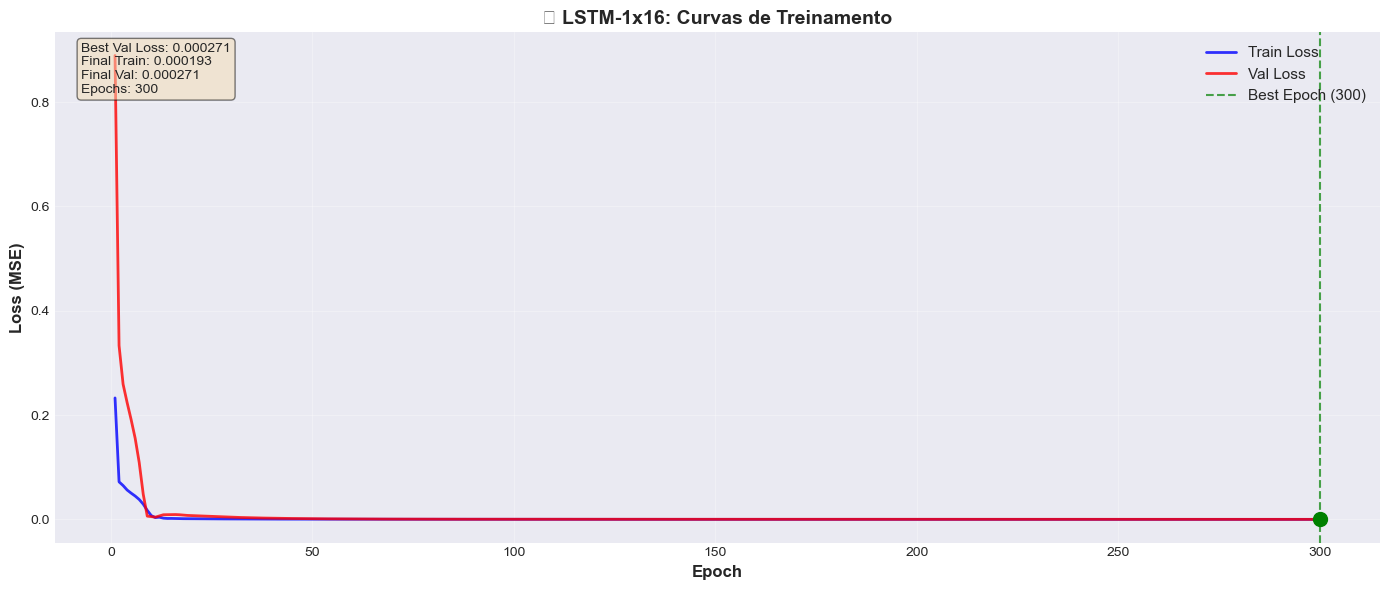


📊 Análise de Convergência:
   Epochs treinados: 300
   Melhor epoch: 300
   Best val loss: 0.000271
   Train loss final: 0.000193
   Val loss final: 0.000271
   Gap train-val: 0.000077
   ✅ Modelo bem balanceado (sem overfitting)


In [28]:
# ============================================================
# 1. CURVAS DE TREINAMENTO (Loss)
# ============================================================

best_result = results_comparison['LSTM-1x16 (Tiny)']
train_losses = best_result['train_losses']
val_losses = best_result['val_losses']

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

epochs = range(1, len(train_losses) + 1)

ax.plot(epochs, train_losses, 'b-', linewidth=2, label='Train Loss', alpha=0.8)
ax.plot(epochs, val_losses, 'r-', linewidth=2, label='Val Loss', alpha=0.8)

# Marcar melhor epoch
best_epoch = np.argmin(val_losses) + 1
best_val_loss = min(val_losses)
ax.axvline(best_epoch, color='green', linestyle='--', linewidth=1.5, 
           label=f'Best Epoch ({best_epoch})', alpha=0.7)
ax.scatter([best_epoch], [best_val_loss], color='green', s=100, zorder=5)

ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
ax.set_title('📉 LSTM-1x16: Curvas de Treinamento', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3)

# Adicionar métricas no gráfico
textstr = f'Best Val Loss: {best_val_loss:.6f}\nFinal Train: {train_losses[-1]:.6f}\nFinal Val: {val_losses[-1]:.6f}\nEpochs: {len(train_losses)}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print(f"\n📊 Análise de Convergência:")
print(f"   Epochs treinados: {len(train_losses)}")
print(f"   Melhor epoch: {best_epoch}")
print(f"   Best val loss: {best_val_loss:.6f}")
print(f"   Train loss final: {train_losses[-1]:.6f}")
print(f"   Val loss final: {val_losses[-1]:.6f}")
print(f"   Gap train-val: {abs(train_losses[-1] - val_losses[-1]):.6f}")

if abs(train_losses[-1] - val_losses[-1]) < 0.001:
    print(f"   ✅ Modelo bem balanceado (sem overfitting)")
else:
    print(f"   ⚠️ Verificar possível overfitting")

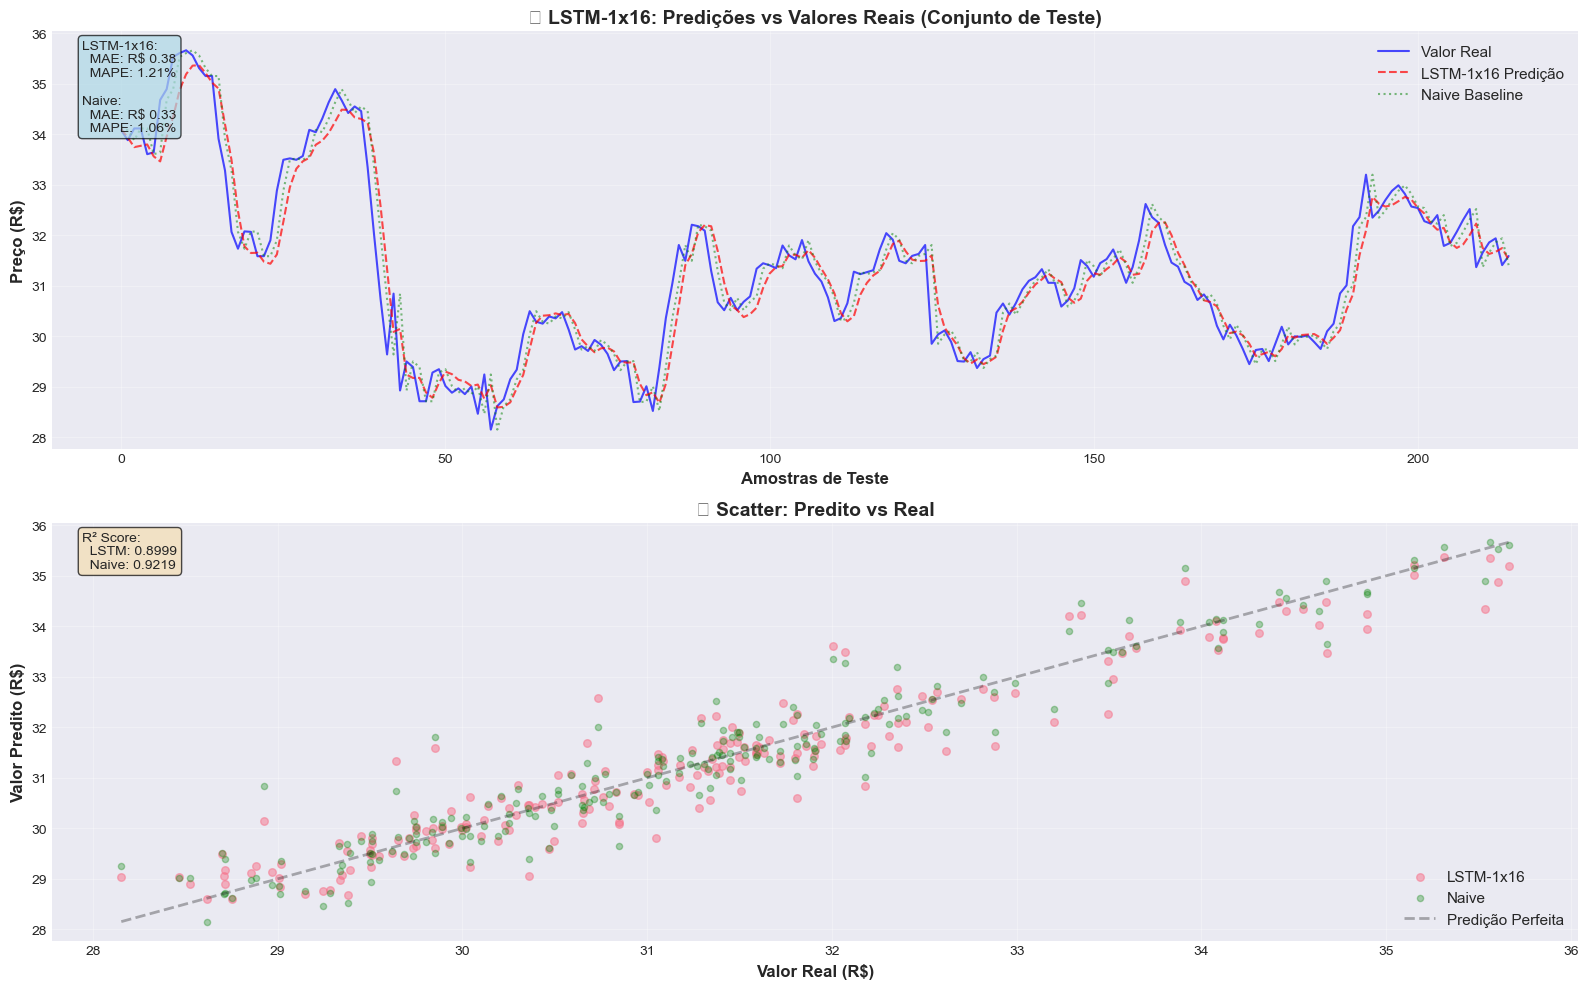


📊 Comparação de Performance:
   LSTM-1x16 R²: 0.8999
   Naive R²: 0.9219
   Diferença: -0.0219


In [29]:
# ============================================================
# 2. PREDIÇÕES vs VALORES REAIS (Teste)
# ============================================================

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Serie temporal completa
axes[0].plot(y_test_real, 'b-', linewidth=1.5, label='Valor Real', alpha=0.7)
axes[0].plot(best_predictions, 'r--', linewidth=1.5, label='LSTM-1x16 Predição', alpha=0.7)
axes[0].plot(naive_predictions_real, 'g:', linewidth=1.5, label='Naive Baseline', alpha=0.5)

axes[0].set_xlabel('Amostras de Teste', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Preço (R$)', fontsize=12, fontweight='bold')
axes[0].set_title('🎯 LSTM-1x16: Predições vs Valores Reais (Conjunto de Teste)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11, loc='best')
axes[0].grid(True, alpha=0.3)

# Adicionar métricas
textstr = f'LSTM-1x16:\n  MAE: R$ {best_result["mae"]:.2f}\n  MAPE: {best_result["mape"]:.2f}%\n\nNaive:\n  MAE: R$ {naive_mae:.2f}\n  MAPE: {naive_mape:.2f}%'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.7)
axes[0].text(0.02, 0.98, textstr, transform=axes[0].transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

# Plot 2: Scatter plot (predito vs real)
axes[1].scatter(y_test_real, best_predictions, alpha=0.5, s=30, label='LSTM-1x16')
axes[1].scatter(y_test_real, naive_predictions_real, alpha=0.3, s=20, color='green', label='Naive')

# Linha ideal (y=x)
min_val = min(y_test_real.min(), best_predictions.min())
max_val = max(y_test_real.max(), best_predictions.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, 
            label='Predição Perfeita', alpha=0.3)

axes[1].set_xlabel('Valor Real (R$)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Valor Predito (R$)', fontsize=12, fontweight='bold')
axes[1].set_title('🎯 Scatter: Predito vs Real', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11, loc='best')
axes[1].grid(True, alpha=0.3)

# R² score
from sklearn.metrics import r2_score
r2_lstm = r2_score(y_test_real, best_predictions)
r2_naive = r2_score(y_test_real, naive_predictions_real)
textstr = f'R² Score:\n  LSTM: {r2_lstm:.4f}\n  Naive: {r2_naive:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
axes[1].text(0.02, 0.98, textstr, transform=axes[1].transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print(f"\n📊 Comparação de Performance:")
print(f"   LSTM-1x16 R²: {r2_lstm:.4f}")
print(f"   Naive R²: {r2_naive:.4f}")
print(f"   Diferença: {r2_lstm - r2_naive:.4f}")

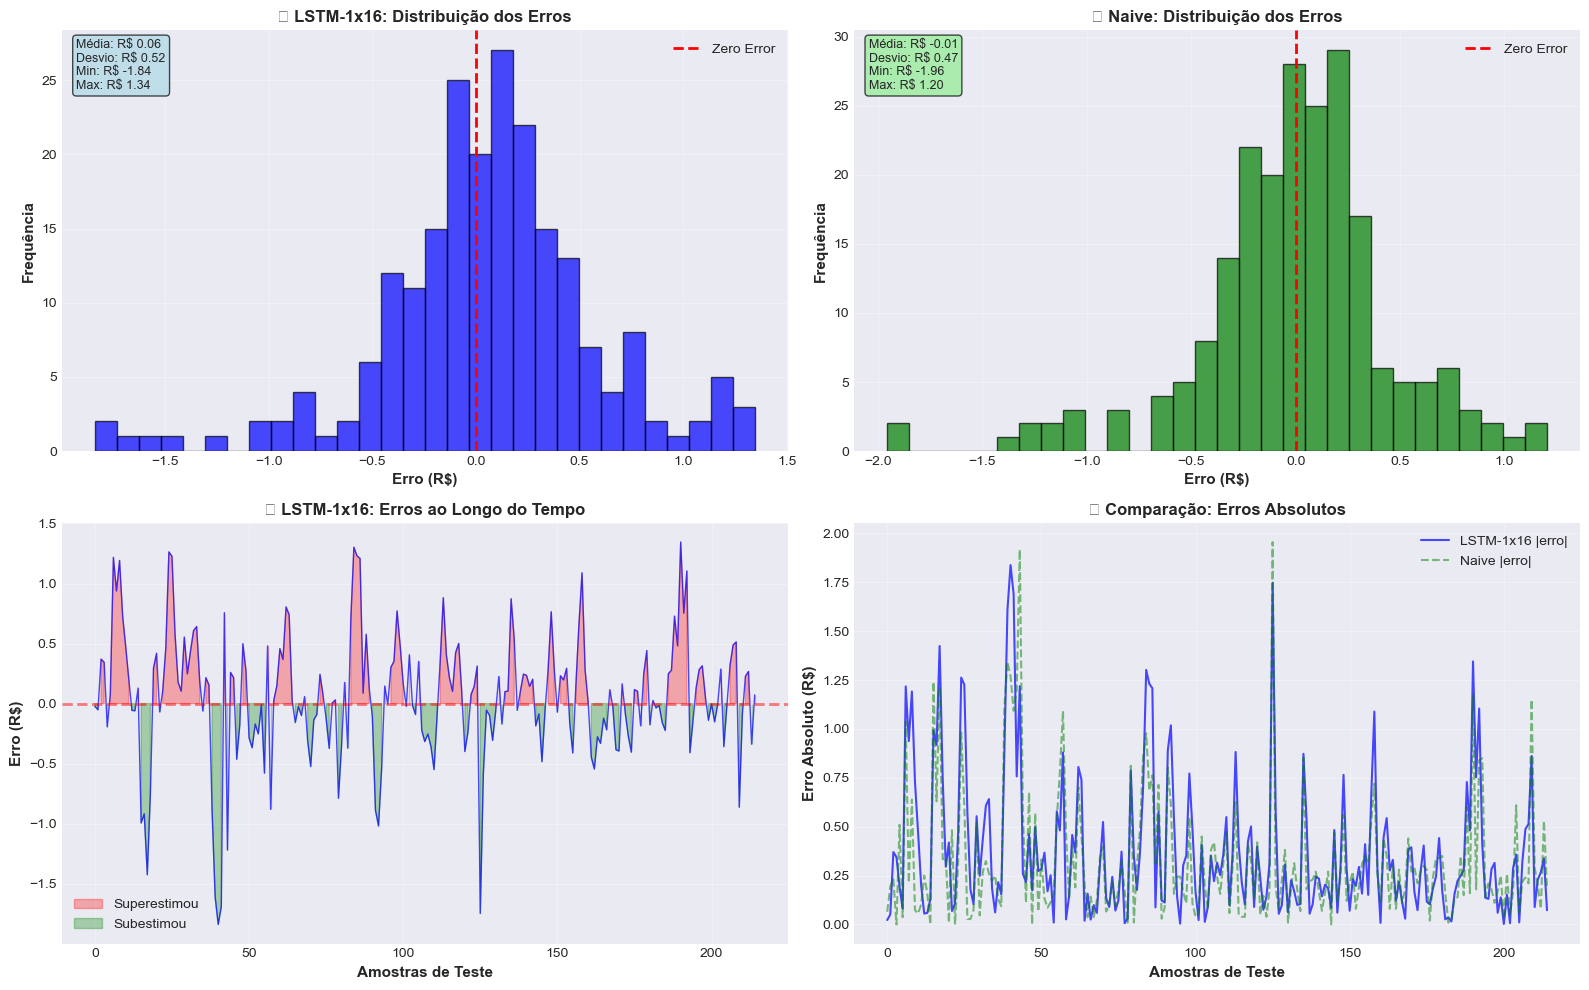


📊 Análise de Erros:

🔵 LSTM-1x16:
   Erro médio: R$ 0.06
   Desvio padrão: R$ 0.52
   Erro máximo: R$ 1.34
   Erro mínimo: R$ -1.84

🟢 Naive:
   Erro médio: R$ -0.01
   Desvio padrão: R$ 0.47
   Erro máximo: R$ 1.20
   Erro mínimo: R$ -1.96

📊 Teste de Normalidade (Shapiro-Wilk):
   LSTM p-value: 0.0000 ⚠️ Não-normal
   Naive p-value: 0.0000 ⚠️ Não-normal


In [31]:
# ============================================================
# 3. ANÁLISE DE ERROS
# ============================================================

# Calcular erros
errors_lstm = y_test_real - best_predictions
errors_naive = y_test_real - naive_predictions_real

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribuição dos erros (LSTM)
axes[0, 0].hist(errors_lstm, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 0].set_xlabel('Erro (R$)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequência', fontsize=11, fontweight='bold')
axes[0, 0].set_title('📊 LSTM-1x16: Distribuição dos Erros', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Estatísticas
mean_error = errors_lstm.mean()
std_error = errors_lstm.std()
textstr = f'Média: R$ {mean_error:.2f}\nDesvio: R$ {std_error:.2f}\nMin: R$ {errors_lstm.min():.2f}\nMax: R$ {errors_lstm.max():.2f}'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.7)
axes[0, 0].text(0.02, 0.98, textstr, transform=axes[0, 0].transAxes, fontsize=9,
               verticalalignment='top', bbox=props)

# 2. Distribuição dos erros (Naive)
axes[0, 1].hist(errors_naive, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 1].set_xlabel('Erro (R$)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequência', fontsize=11, fontweight='bold')
axes[0, 1].set_title('📊 Naive: Distribuição dos Erros', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Estatísticas
mean_error_naive = errors_naive.mean()
std_error_naive = errors_naive.std()
textstr = f'Média: R$ {mean_error_naive:.2f}\nDesvio: R$ {std_error_naive:.2f}\nMin: R$ {errors_naive.min():.2f}\nMax: R$ {errors_naive.max():.2f}'
props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.7)
axes[0, 1].text(0.02, 0.98, textstr, transform=axes[0, 1].transAxes, fontsize=9,
               verticalalignment='top', bbox=props)

# 3. Erros ao longo do tempo (LSTM)
axes[1, 0].plot(errors_lstm, 'b-', linewidth=1, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1, 0].fill_between(range(len(errors_lstm)), 0, errors_lstm, 
                        where=(errors_lstm > 0), color='red', alpha=0.3, label='Superestimou')
axes[1, 0].fill_between(range(len(errors_lstm)), 0, errors_lstm, 
                        where=(errors_lstm <= 0), color='green', alpha=0.3, label='Subestimou')
axes[1, 0].set_xlabel('Amostras de Teste', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Erro (R$)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('📈 LSTM-1x16: Erros ao Longo do Tempo', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Comparação direta dos erros absolutos
axes[1, 1].plot(np.abs(errors_lstm), 'b-', linewidth=1.5, label='LSTM-1x16 |erro|', alpha=0.7)
axes[1, 1].plot(np.abs(errors_naive), 'g--', linewidth=1.5, label='Naive |erro|', alpha=0.5)
axes[1, 1].set_xlabel('Amostras de Teste', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Erro Absoluto (R$)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('📊 Comparação: Erros Absolutos', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Análise de Erros:")
print(f"\n🔵 LSTM-1x16:")
print(f"   Erro médio: R$ {mean_error:.2f}")
print(f"   Desvio padrão: R$ {std_error:.2f}")
print(f"   Erro máximo: R$ {errors_lstm.max():.2f}")
print(f"   Erro mínimo: R$ {errors_lstm.min():.2f}")

print(f"\n🟢 Naive:")
print(f"   Erro médio: R$ {mean_error_naive:.2f}")
print(f"   Desvio padrão: R$ {std_error_naive:.2f}")
print(f"   Erro máximo: R$ {errors_naive.max():.2f}")
print(f"   Erro mínimo: R$ {errors_naive.min():.2f}")

# Teste de normalidade dos erros (devem ser ~normal se modelo bom)
from scipy import stats
_, p_value_lstm = stats.shapiro(errors_lstm)
_, p_value_naive = stats.shapiro(errors_naive)

print(f"\n📊 Teste de Normalidade (Shapiro-Wilk):")
print(f"   LSTM p-value: {p_value_lstm:.4f} {'✅ Normal' if p_value_lstm > 0.05 else '⚠️ Não-normal'}")
print(f"   Naive p-value: {p_value_naive:.4f} {'✅ Normal' if p_value_naive > 0.05 else '⚠️ Não-normal'}")